# ENDTERM Project Data Analysis <hr style="border:2.5px solid #126782"></hr>

Name: **Ely John C. Punzalan** <br>
Course: **CPE2A**

# Dataset Setup

## Setting Up the Data File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"../dataset/student-record-adjusted-fixed.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9629 entries, 0 to 9628
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             9629 non-null   float64
 1   Gender          9629 non-null   object 
 2   StudyHrs        9629 non-null   float64
 3   Learning_Style  9629 non-null   object 
 4   Courses_Comp    9629 non-null   float64
 5   Discuss_Part    9629 non-null   int64  
 6   AssignRate      9629 non-null   float64
 7   Exam_Score(%)   9629 non-null   float64
 8   AttendRate      9629 non-null   float64
 9   TechUse         9629 non-null   object 
 10  StressLevel     9629 non-null   int64  
 11  SocMediaHrs     9629 non-null   int64  
 12  SleepHrs        9629 non-null   int64  
 13  Equiv_Grade     9629 non-null   float64
 14  College         9629 non-null   object 
 15  Degree_Program  9629 non-null   object 
dtypes: float64(7), int64(4), object(5)
memory usage: 1.2+ MB


In [3]:
df.head()

Age  Gender  StudyHrs   Learning_Style  Courses_Comp  Discuss_Part  \
0  18.0  Female      48.0      Kinesthetic          14.0             1   
1  29.0  Female      30.0  Reading/Writing          20.0             0   
2  20.0  Female      47.0      Kinesthetic          11.0             0   
3  23.0  Female      13.0         Auditory           0.0             1   
4  19.0  Female      24.0         Auditory          19.0             1   

   AssignRate  Exam_Score(%)  AttendRate TechUse  StressLevel  SocMediaHrs  \
0       100.0      71.268686        66.0     Yes            6            2   
1        71.0      49.099419        57.0     Yes            2            6   
2        60.0      63.070982        79.0     Yes            4            6   
3        63.0      42.233870        60.0     Yes            6            5   
4        59.0      62.486618        93.0     Yes            5            5   

   SleepHrs  Equiv_Grade               College           Degree_Program  
0         6    82.761211           Engineering                Aerospace  
1         5    57.859651       Health Sciences                 Pharmacy  
2         6    61.842589       Health Sciences       Medical Technology  
3         5    50.540322  Business and Finance  Business Administration  
4         4    61.091971       Health Sciences                  Nursing

In [4]:
df_active = df.copy()
df_active.describe()

Age     StudyHrs  Courses_Comp  Discuss_Part   AssignRate  \
count  9629.000000  9629.000000   9629.000000   9629.000000  9629.000000   
mean     23.474608    27.172707     10.004466      0.601516    74.957420   
std       3.464267    12.993982      6.136337      0.489611    14.657014   
min      18.000000     5.000000      0.000000      0.000000    50.000000   
25%      20.000000    16.000000      5.000000      0.000000    62.000000   
50%      23.000000    27.000000     10.000000      1.000000    75.000000   
75%      27.000000    38.000000     15.000000      1.000000    88.000000   
max      29.000000    49.000000     20.000000      1.000000   100.000000   

       Exam_Score(%)   AttendRate  StressLevel  SocMediaHrs     SleepHrs  \
count    9629.000000  9629.000000  9629.000000  9629.000000  9629.000000   
mean       56.345398    75.032921     5.114861     3.520615     6.265656   
std        12.726381    14.761779     3.001920     1.937032     1.463461   
min        21.500000    50.000000     1.000000     0.000000     4.000000   
25%        47.446643    62.000000     2.000000     2.000000     5.000000   
50%        56.400000    75.000000     5.000000     3.000000     6.000000   
75%        65.356665    88.000000     8.000000     5.000000     7.000000   
max        95.600000   100.000000    10.000000    10.000000    10.000000   

       Equiv_Grade  
count  9629.000000  
mean     63.790207  
std      10.628451  
min      33.260000  
25%      56.238113  
50%      63.884937  
75%      71.282526  
max      96.640000

# Data Visualization and Analysis

## I. University Student Demographics

### A. Student Population

In [5]:
df_collegepop = df_active.groupby("College").size()
df_collegepop

College
Business and Finance    3213
Engineering             3234
Health Sciences         3182
dtype: int64

#### i. College of Engineering

In [6]:
df_engineering = df_active[df_active['College'] == 'Engineering']
df_department_counts = df_engineering['Degree_Program'].value_counts()
df_department_counts.sort_values(ascending=False)

Degree_Program
Computer      676
Electrical    665
Aerospace     639
Mechanical    633
Civil         621
Name: count, dtype: int64

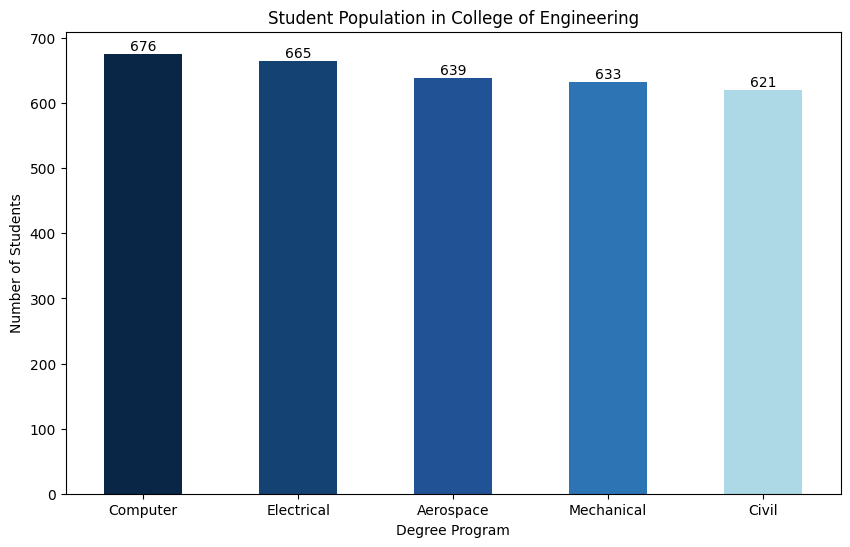

In [7]:
chart_eng = df_department_counts.plot(kind='bar', 
                                  color=['#0A2647', '#144272', '#205295', '#2C74B3', 'lightblue'],
                                  figsize=(10, 6))

plt.title('Student Population in College of Engineering')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')

chart_eng.bar_label(chart_eng.containers[0])

plt.xticks(rotation=0)
plt.show()

#### ii. College of Business and Finance

In [8]:
df_busfinance = df_active[df_active['College'] == 'Business and Finance']
df_department_counts = df_busfinance['Degree_Program'].value_counts()
df_department_counts.sort_values(ascending=False)

Degree_Program
Finance                    831
Marketing                  808
Accountancy                794
Business Administration    780
Name: count, dtype: int64

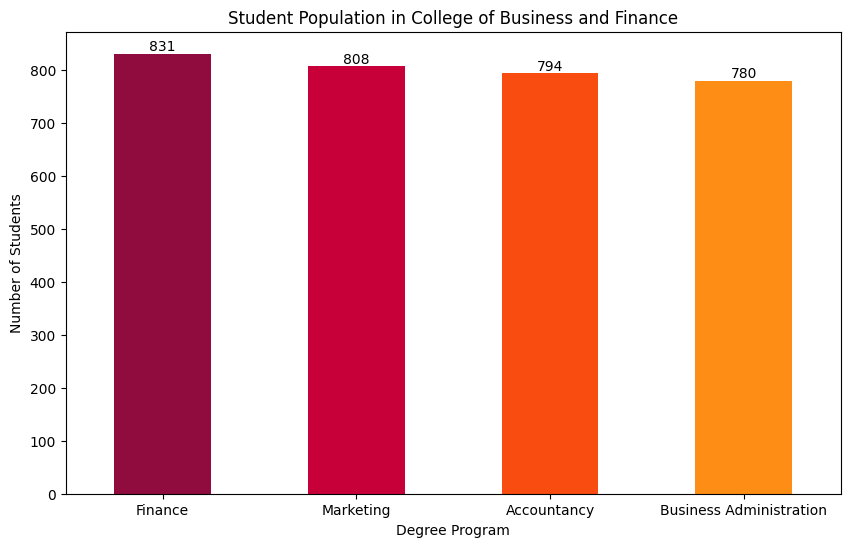

In [9]:
chart_busfin = df_department_counts.plot(kind='bar', 
                                  color=['#900C3F', '#C70039', '#F94C10', '#FD8D14'],
                                  figsize=(10, 6))

plt.title('Student Population in College of Business and Finance')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')

chart_busfin.bar_label(chart_busfin.containers[0])

plt.xticks(rotation=0)
plt.show()

#### iii. College of Health Sciences

In [10]:
df_healthsci = df_active[df_active['College'] == 'Health Sciences']
df_department_counts = df_healthsci['Degree_Program'].value_counts()
df_department_counts.sort_values(ascending=False)

Degree_Program
Nursing               823
Pharmacy              814
Medical Technology    778
Physical Therapy      767
Name: count, dtype: int64

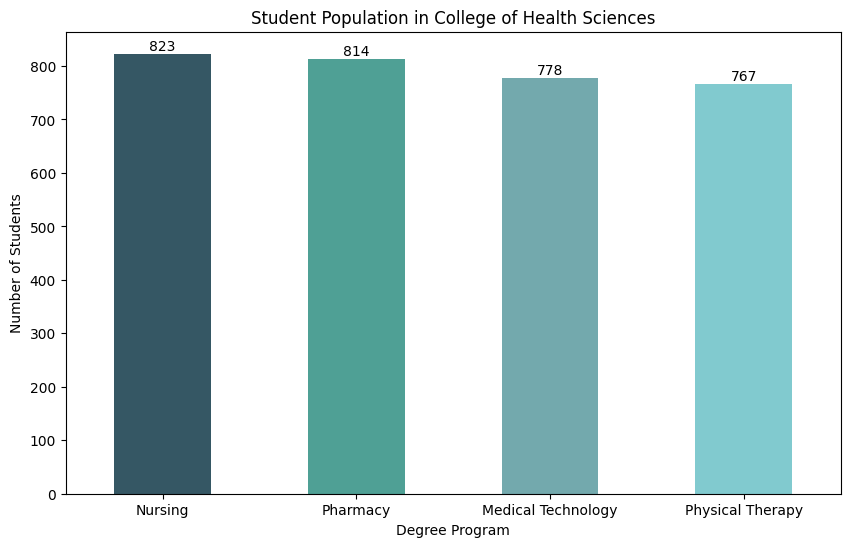

In [11]:
chart_healthsci = df_department_counts.plot(kind='bar', 
                                  color=['#355764', '#4FA095', '#73A9AD', '#81CACF'],
                                  figsize=(10, 6))

plt.title('Student Population in College of Health Sciences')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')

chart_healthsci.bar_label(chart_healthsci.containers[0])

plt.xticks(rotation=0)
plt.show()

### B. Age Distribution

#### i. General Student Population

In [12]:
df_age_demo = df_active[['Age']]
df_age_demo.head()

Age
0  18.0
1  29.0
2  20.0
3  23.0
4  19.0

In [13]:
age_count = df_age_demo.groupby('Age').value_counts()
age_count

Age
18.0    815
19.0    810
20.0    818
21.0    853
22.0    770
23.0    785
24.0    743
25.0    830
26.0    791
27.0    823
28.0    799
29.0    792
Name: count, dtype: int64

In [14]:
bins = [17, 20, 23, 26, 29]
labels = ['18-20', '21-23', '24-26', '27-29']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['Age_Group']


0       18-20
1       27-29
2       18-20
3       21-23
4       18-20
        ...  
9624    18-20
9625    21-23
9626    24-26
9627    18-20
9628    24-26
Name: Age_Group, Length: 9629, dtype: category
Categories (4, object): ['18-20' < '21-23' < '24-26' < '27-29']

In [15]:
age_group_counts = df['Age_Group'].value_counts().sort_index()
age_group_counts

Age_Group
18-20    2443
21-23    2408
24-26    2364
27-29    2414
Name: count, dtype: int64

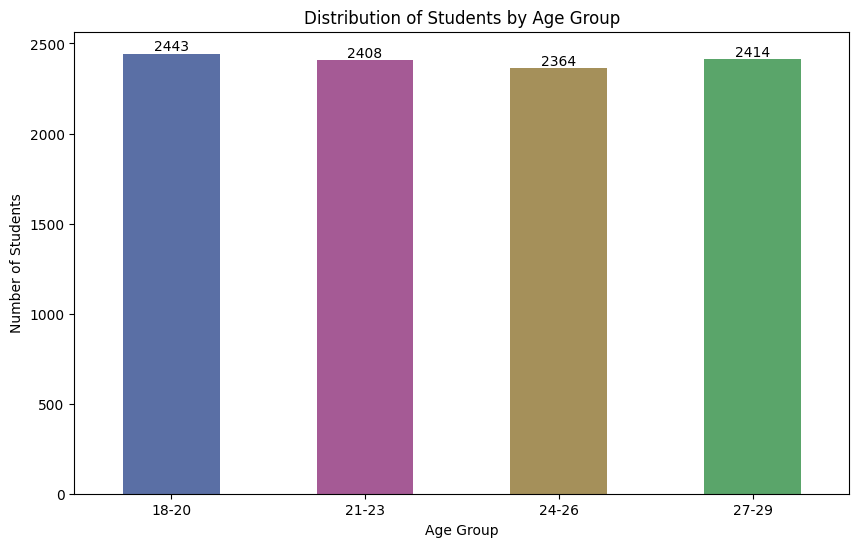

In [16]:
chart = age_group_counts.plot(kind='bar', 
                              color=['#5A6FA5','#A55A95','#A5905A','#5AA56A'],
                              figsize=(10, 6))
chart.set_xticklabels(age_group_counts.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')

plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Age Group')
plt.xticks(rotation=0)
plt.show()

#### ii. College of Engineering

In [17]:
df_engdemo_age = df_active[['Age']].where(df_active['College'] == 'Engineering')
eng_agecount = df_engdemo_age.groupby('Age').value_counts()
eng_agecount

Age
18.0    279
19.0    258
20.0    261
21.0    284
22.0    249
23.0    277
24.0    260
25.0    281
26.0    285
27.0    248
28.0    279
29.0    273
Name: count, dtype: int64

In [18]:
df_engdemo_age['Age_Group'] = pd.cut(df_engdemo_age['Age'], bins=bins, labels=labels)
eng_agegrp_counts = df_engdemo_age['Age_Group'].value_counts().sort_index()
eng_agegrp_counts

Age_Group
18-20    798
21-23    810
24-26    826
27-29    800
Name: count, dtype: int64

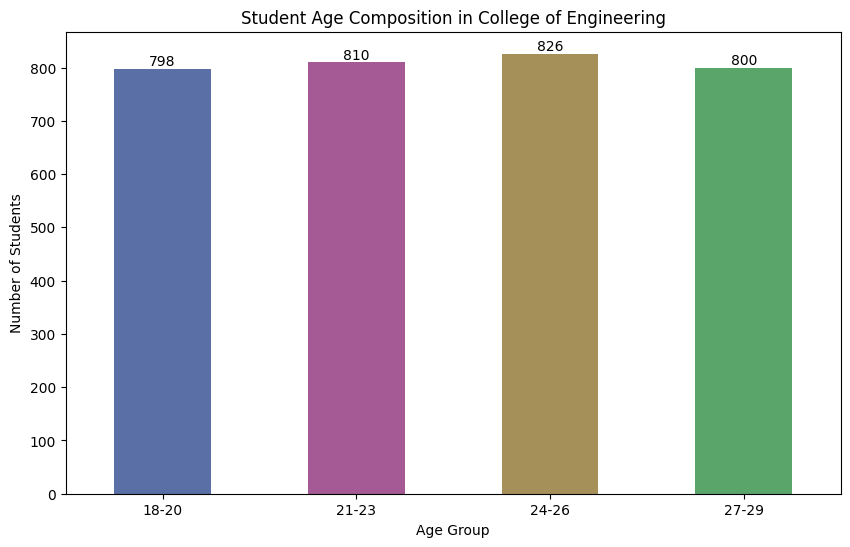

In [19]:
chart = eng_agegrp_counts.plot(kind='bar', 
                              color=['#5A6FA5','#A55A95','#A5905A','#5AA56A'],
                              figsize=(10, 6))
chart.set_xticklabels(eng_agegrp_counts.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')

plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.title('Student Age Composition in College of Engineering')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [20]:
df_busfindemo_age = df_active[['Age']].where(df_active['College'] == 'Business and Finance')
busfin_agecount = df_busfindemo_age.groupby('Age').value_counts()
busfin_agecount

Age
18.0    266
19.0    278
20.0    274
21.0    295
22.0    269
23.0    260
24.0    247
25.0    268
26.0    257
27.0    281
28.0    256
29.0    262
Name: count, dtype: int64

In [21]:
df_busfindemo_age['Age_Group'] = pd.cut(df_busfindemo_age['Age'], bins=bins, labels=labels)
busfin_agegrp_counts = df_busfindemo_age['Age_Group'].value_counts().sort_index()
busfin_agegrp_counts

Age_Group
18-20    818
21-23    824
24-26    772
27-29    799
Name: count, dtype: int64

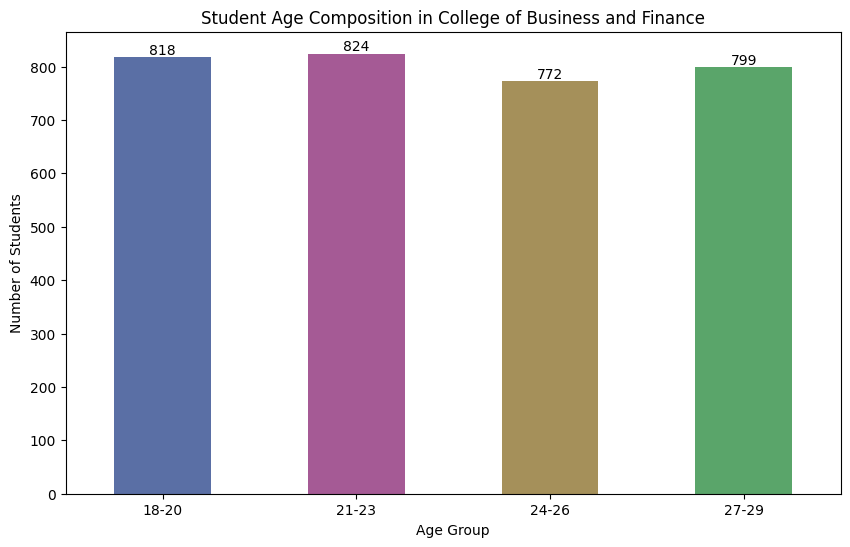

In [22]:
chart = busfin_agegrp_counts.plot(kind='bar', 
                              color=['#5A6FA5','#A55A95','#A5905A','#5AA56A'],
                              figsize=(10, 6))
chart.set_xticklabels(busfin_agegrp_counts.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')

plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.title('Student Age Composition in College of Business and Finance')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [23]:
df_healthscidemo_age = df_active[['Age']].where(df_active['College'] == 'Health Sciences')
healthsci_agecount = df_healthscidemo_age.groupby('Age').value_counts()
healthsci_agecount

Age
18.0    270
19.0    274
20.0    283
21.0    274
22.0    252
23.0    248
24.0    236
25.0    281
26.0    249
27.0    294
28.0    264
29.0    257
Name: count, dtype: int64

In [24]:
df_healthscidemo_age['Age_Group'] = pd.cut(df_healthscidemo_age['Age'], bins=bins, labels=labels)
healthsci_agegrp_counts = df_healthscidemo_age['Age_Group'].value_counts().sort_index()
healthsci_agegrp_counts

Age_Group
18-20    827
21-23    774
24-26    766
27-29    815
Name: count, dtype: int64

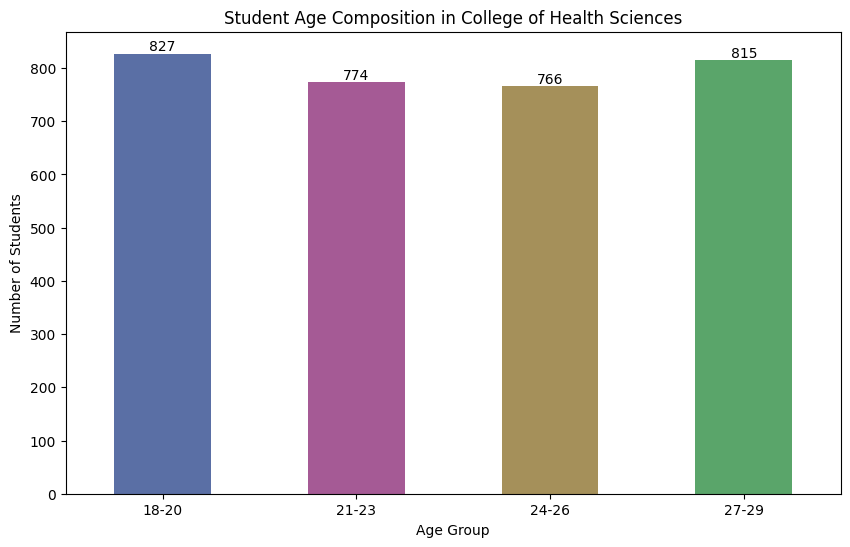

In [25]:
chart = healthsci_agegrp_counts.plot(kind='bar', 
                              color=['#5A6FA5','#A55A95','#A5905A','#5AA56A'],
                              figsize=(10, 6))
chart.set_xticklabels(healthsci_agegrp_counts.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')

plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.title('Student Age Composition in College of Health Sciences')
plt.xticks(rotation=0)
plt.show()

### C. Gender Composition

#### i. General Student Population

In [26]:
gender_counts = df_active['Gender'].value_counts()
gender_counts

Gender
Female    4661
Male      4578
Other      390
Name: count, dtype: int64

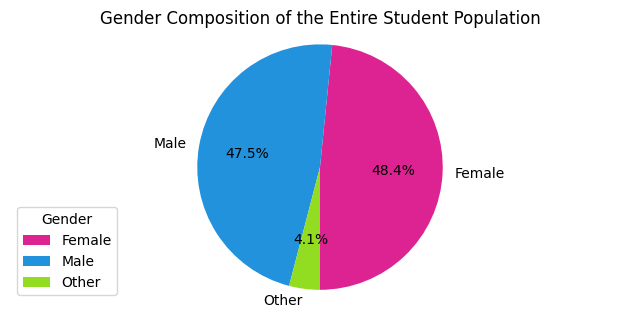

In [27]:
autopct_format = lambda values: (lambda pct: 
                                 f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(8, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
    colors=['#DD2292', '#2292DD', '#92DD22'], startangle=270)
plt.title('Gender Composition of the Entire Student Population')
plt.axis('equal')
plt.subplots_adjust(top=0.65)
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(0, 0)) 

plt.show()

#### ii. College of Engineering

In [28]:
df_engineering = df_active[df_active['College'] == 'Engineering']
df_engineering.head()

Age  Gender  StudyHrs   Learning_Style  Courses_Comp  Discuss_Part  \
0   18.0  Female      48.0      Kinesthetic          14.0             1   
6   19.0  Female      49.0  Reading/Writing          13.0             1   
9   28.0   Other      35.0         Auditory           7.0             0   
10  23.0    Male      40.0      Kinesthetic          20.0             0   
13  27.0    Male      44.0  Reading/Writing          20.0             0   

    AssignRate  Exam_Score(%)  AttendRate TechUse  StressLevel  SocMediaHrs  \
0        100.0      71.268686        66.0     Yes            6            2   
6         91.0      82.000000        66.0     Yes            1            8   
9        100.0      69.591844       100.0      No            5            0   
10        74.0      70.576553        93.0      No            2            4   
13        80.0      60.800000        51.0     Yes            1            3   

    SleepHrs  Equiv_Grade      College Degree_Program  
0          6    82.761211  Engineering      Aerospace  
6          5    85.600000  Engineering       Computer  
9          7    81.755106  Engineering          Civil  
10         5    71.945932  Engineering          Civil  
13         4    68.480000  Engineering          Civil

In [29]:
gencomp_eng = df_engineering.groupby(['Degree_Program', 'Gender']).size()
gencomp_eng

Degree_Program  Gender
Aerospace       Female    307
                Male      304
                Other      28
Civil           Female    290
                Male      310
                Other      21
Computer        Female    333
                Male      316
                Other      27
Electrical      Female    316
                Male      320
                Other      29
Mechanical      Female    318
                Male      292
                Other      23
dtype: int64

In [30]:
gencomp_eng = gencomp_eng.unstack()
gencomp_eng

Gender          Female  Male  Other
Degree_Program                     
Aerospace          307   304     28
Civil              290   310     21
Computer           333   316     27
Electrical         316   320     29
Mechanical         318   292     23

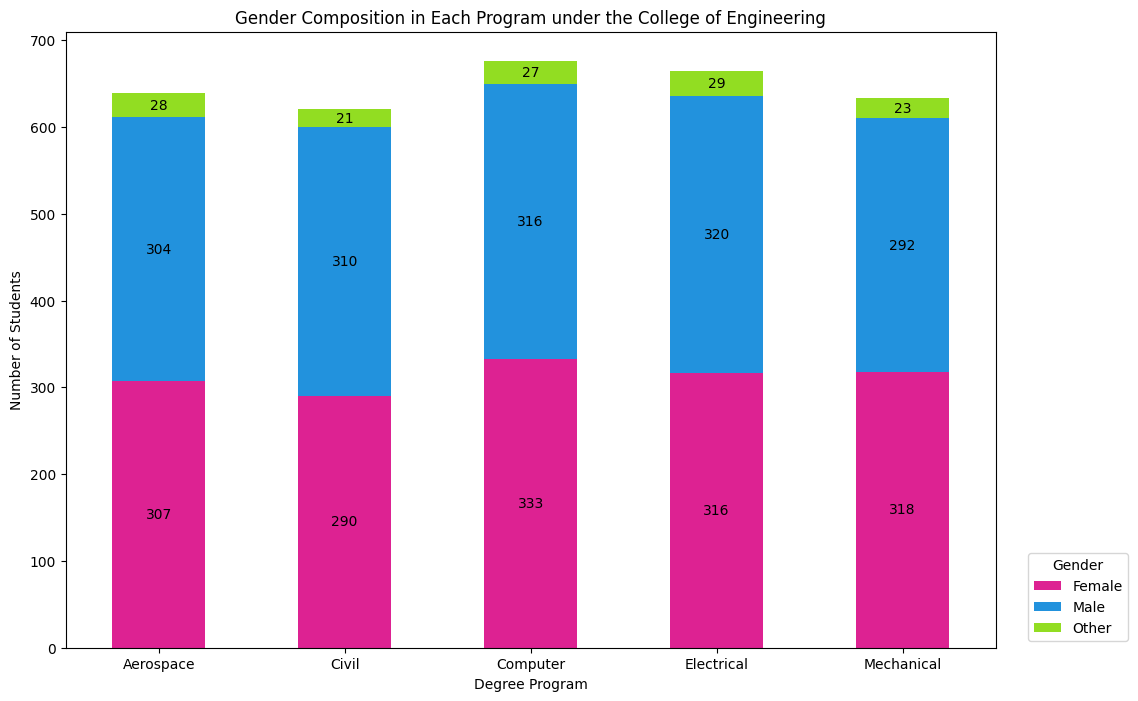

In [31]:
ax = gencomp_eng.plot(kind='bar', 
                        stacked=True, 
                        figsize=(12, 8),
                        color=['#DD2292', '#2292DD', '#92DD22'])

plt.title('Gender Composition in Each Program under the College of Engineering')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Gender', loc='lower right', bbox_to_anchor=(1.15, 0))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

#### iii. College of Business and Finance

In [32]:
df_busfin = df_active[df_active['College'] == 'Business and Finance']
df_busfin.head()

Age  Gender  StudyHrs Learning_Style  Courses_Comp  Discuss_Part  \
3   23.0  Female      13.0       Auditory           0.0             1   
5   28.0  Female      26.0    Kinesthetic           5.0             1   
8   22.0    Male      45.0         Visual          16.0             0   
12  23.0  Female      24.0         Visual           4.0             0   
17  18.0    Male       8.0    Kinesthetic           9.0             1   

    AssignRate  Exam_Score(%)  AttendRate TechUse  StressLevel  SocMediaHrs  \
3         63.0      42.233870        60.0     Yes            6            5   
5         63.0      52.282196        80.0      No            8            7   
8         52.0      45.400000        70.0      No           10            3   
12        67.0      54.754919        93.0     Yes            5            5   
17        52.0      36.489606        69.0      No            8            4   

    SleepHrs  Equiv_Grade               College           Degree_Program  
3          5    50.540322  Business and Finance  Business Administration  
5          4    56.569318  Business and Finance                  Finance  
8          7    48.040000  Business and Finance                  Finance  
12         5    59.652951  Business and Finance                Marketing  
17         5    42.693764  Business and Finance              Accountancy

In [33]:
gencomp_busfin = df_busfin.groupby(['Degree_Program', 'Gender']).size()
gencomp_busfin

Degree_Program           Gender
Accountancy              Female    380
                         Male      385
                         Other      29
Business Administration  Female    356
                         Male      389
                         Other      35
Finance                  Female    399
                         Male      393
                         Other      39
Marketing                Female    403
                         Male      373
                         Other      32
dtype: int64

In [34]:
gencomp_busfin = gencomp_busfin.unstack()
gencomp_busfin

Gender                   Female  Male  Other
Degree_Program                              
Accountancy                 380   385     29
Business Administration     356   389     35
Finance                     399   393     39
Marketing                   403   373     32

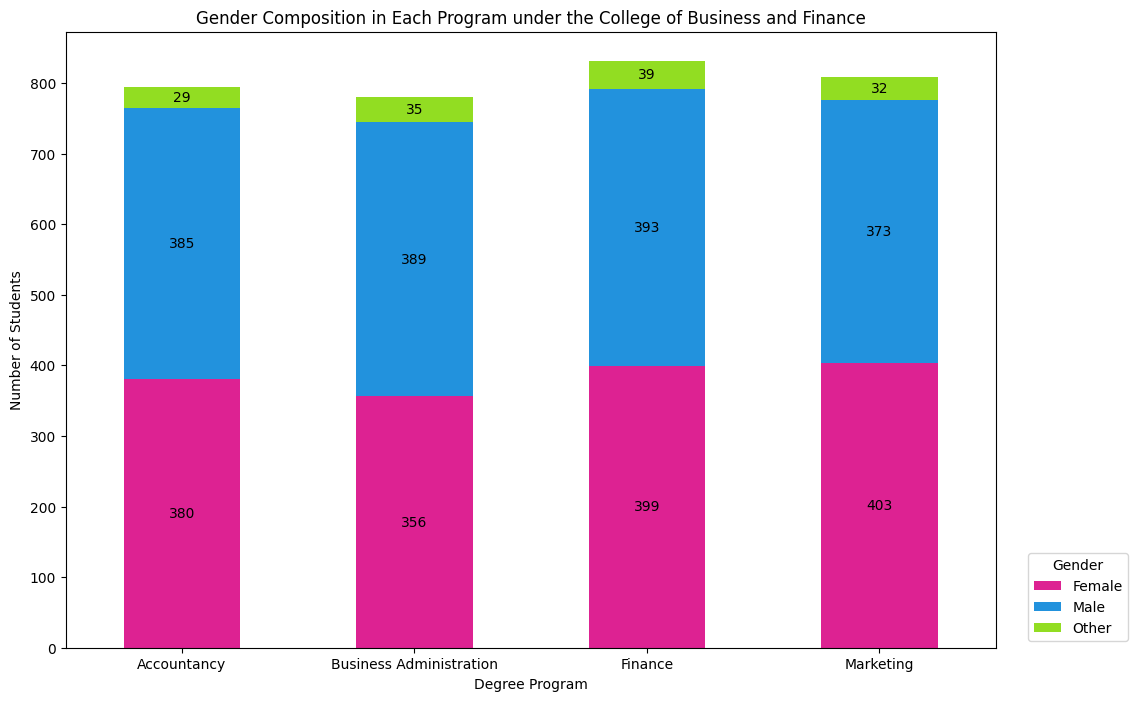

In [35]:
ax = gencomp_busfin.plot(kind='bar', 
                        stacked=True, 
                        figsize=(12, 8),
                        color=['#DD2292', '#2292DD', '#92DD22'])

plt.title('Gender Composition in Each Program under the College of Business and Finance')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Gender', loc='lower right', 
            bbox_to_anchor=(1.15, 0))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

#### iv. College of Health Sciences

In [36]:
df_healthsci = df_active[df_active['College'] == 'Health Sciences']
df_healthsci.head()

Age  Gender  StudyHrs   Learning_Style  Courses_Comp  Discuss_Part  \
1   29.0  Female      30.0  Reading/Writing          20.0             0   
2   20.0  Female      47.0      Kinesthetic          11.0             0   
4   19.0  Female      24.0         Auditory          19.0             1   
7   27.0    Male      14.0  Reading/Writing           5.0             1   
11  23.0    Male      14.0           Visual          18.0             1   

    AssignRate  Exam_Score(%)  AttendRate TechUse  StressLevel  SocMediaHrs  \
1         71.0      49.099419        57.0     Yes            2            6   
2         60.0      63.070982        79.0     Yes            4            6   
4         59.0      62.486618        93.0     Yes            5            5   
7         88.0      53.320339        76.0     Yes            6            5   
11        77.0      49.225214        74.0      No            7            2   

    SleepHrs  Equiv_Grade          College      Degree_Program  
1          5    57.859651  Health Sciences            Pharmacy  
2          6    61.842589  Health Sciences  Medical Technology  
4          4    61.091971  Health Sciences             Nursing  
7          5    67.192203  Health Sciences    Physical Therapy  
11         8    60.335128  Health Sciences  Medical Technology

In [37]:
gencomp_healthsci = df_healthsci.groupby(['Degree_Program', 'Gender']).size()
gencomp_healthsci

Degree_Program      Gender
Medical Technology  Female    385
                    Male      372
                    Other      21
Nursing             Female    411
                    Male      374
                    Other      38
Pharmacy            Female    376
                    Male      408
                    Other      30
Physical Therapy    Female    387
                    Male      342
                    Other      38
dtype: int64

In [38]:
gencomp_healthsci = gencomp_healthsci.unstack()
gencomp_healthsci

Gender              Female  Male  Other
Degree_Program                         
Medical Technology     385   372     21
Nursing                411   374     38
Pharmacy               376   408     30
Physical Therapy       387   342     38

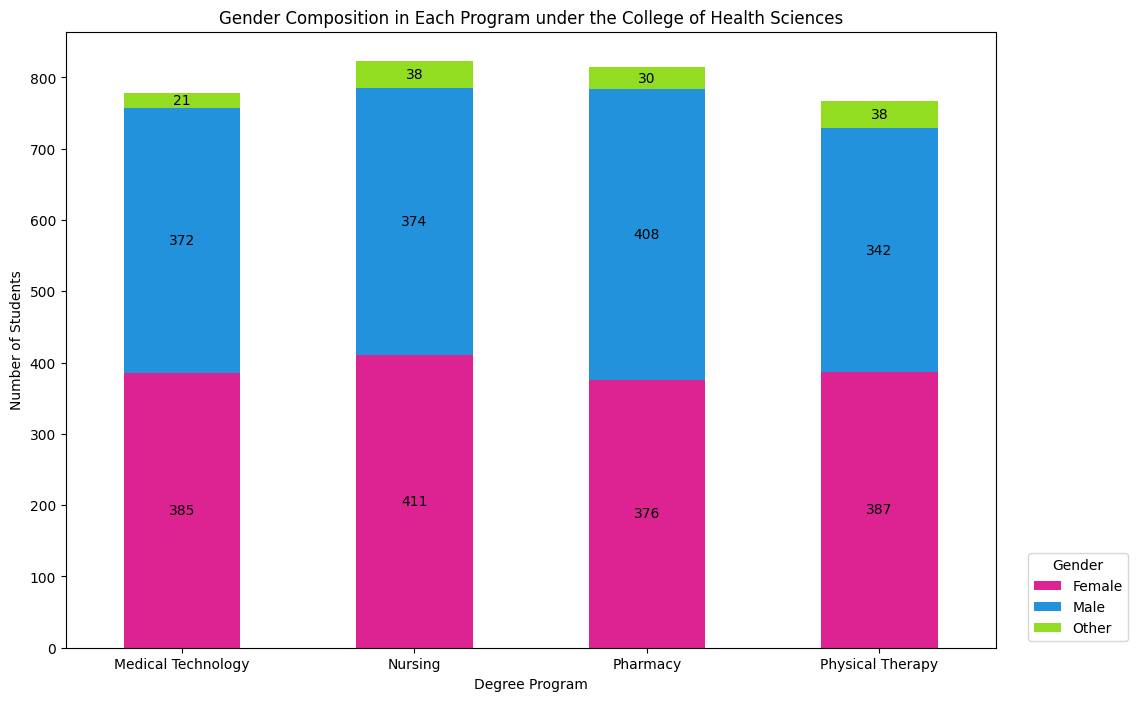

In [39]:
ax = gencomp_healthsci.plot(kind='bar', 
                        stacked=True, 
                        figsize=(12, 8),
                        color=['#DD2292', '#2292DD', '#92DD22'])

plt.title('Gender Composition in Each Program under the College of Health Sciences')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Gender', loc='lower right', bbox_to_anchor=(1.15, 0))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

## II. Academic-Based Demographics


### A. Student Academic Performance

<i>Recommended Number of Bins</i>
<br>
<p>To ensure that the chart fully visualize its purpose, a recommended number of bins will be implemented based on the size and distribution of data points. As such, the Rice Rule method shall determined the number of bins in the histogram.</p>

In [40]:
print("Size of the dataset:", len(df['Equiv_Grade']))
n = len(df['Equiv_Grade'])
number_of_bins = int(np.ceil(2 * np.cbrt(n)))
print("Recommended number of bins using Rice Rule:", number_of_bins)

Size of the dataset: 9629
Recommended number of bins using Rice Rule: 43


#### i. General Population

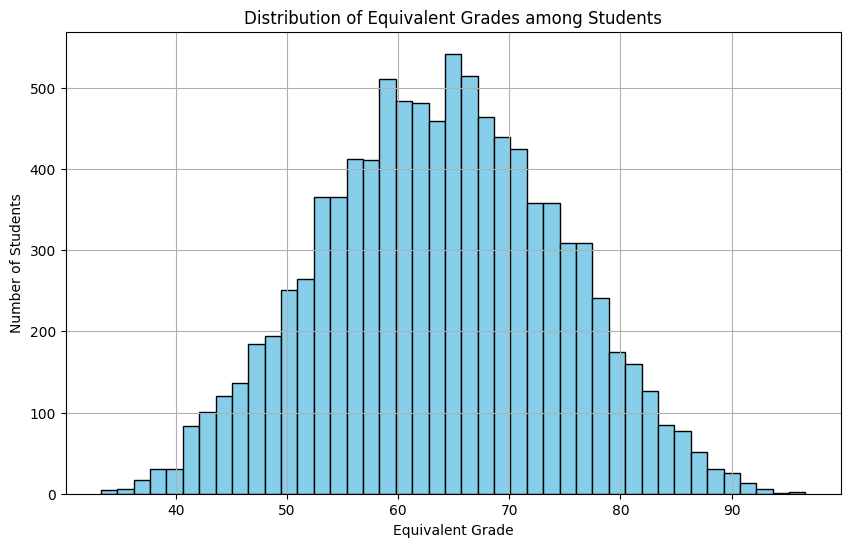

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['Equiv_Grade'], bins=43, color='skyblue', edgecolor='black')
plt.xlabel('Equivalent Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Equivalent Grades among Students')
plt.grid(True)
plt.show()

#### ii. College of Engineering

In [42]:
df_eng_grades = df_engineering[['Equiv_Grade']]
df_eng_grades

Equiv_Grade
0       82.761211
6       85.600000
9       81.755106
10      71.945932
13      68.480000
...           ...
9615    62.960451
9616    61.633232
9621    82.839043
9622    66.000000
9624    62.248179

[3234 rows x 1 columns]

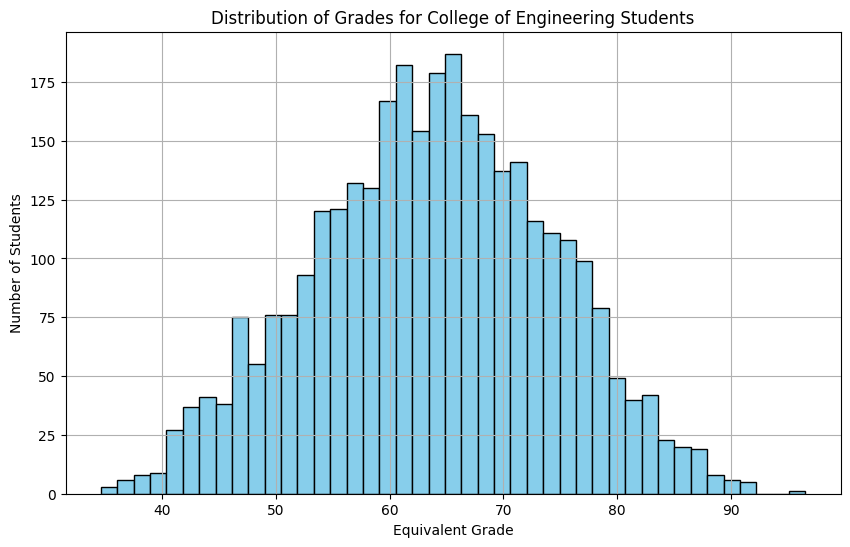

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df_eng_grades['Equiv_Grade'], bins=43, color='skyblue', edgecolor='black')
plt.xlabel('Equivalent Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Grades for College of Engineering Students')
plt.grid(True)
plt.show()

#### iii. College of Business and Finance

In [44]:
df_busfin_grades = df_busfin[['Equiv_Grade']]
df_busfin_grades

Equiv_Grade
3       50.540322
5       56.569318
8       48.040000
12      59.652951
17      42.693764
...           ...
9618    64.054463
9623    71.240000
9625    52.250378
9627    67.330638
9628    67.927789

[3213 rows x 1 columns]

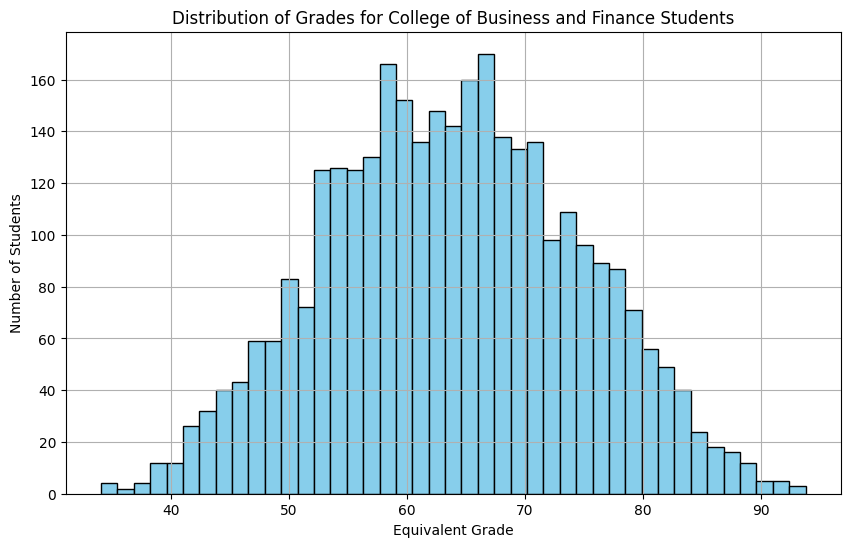

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df_busfin_grades['Equiv_Grade'], bins=43, color='skyblue', edgecolor='black')
plt.xlabel('Equivalent Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Grades for College of Business and Finance Students')
plt.grid(True)
plt.show()

#### iv. College of Health Sciences

In [46]:
df_healthsci_grades = df_healthsci[['Equiv_Grade']]
df_healthsci_grades

Equiv_Grade
1       57.859651
2       61.842589
4       61.091971
7       67.192203
11      60.335128
...           ...
9614    69.877034
9617    64.560000
9619    72.326702
9620    56.991313
9626    57.960000

[3182 rows x 1 columns]

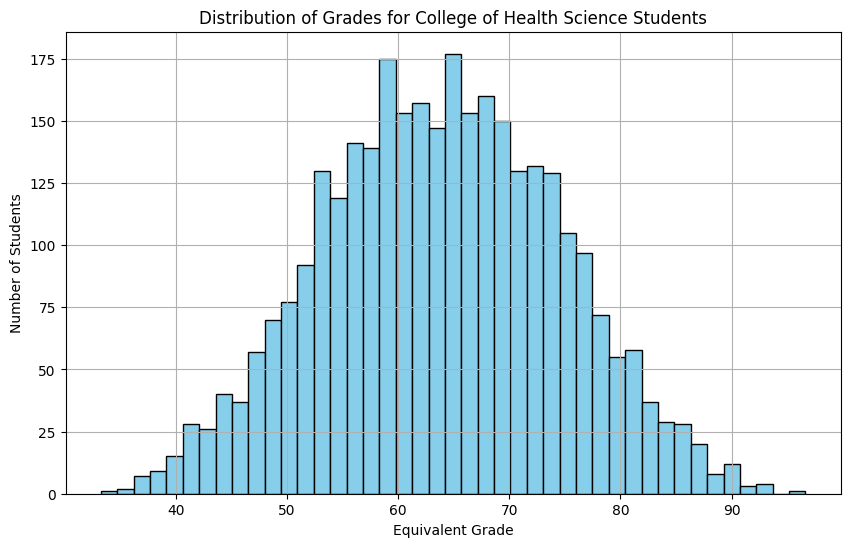

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(df_healthsci_grades['Equiv_Grade'], bins=43, color='skyblue', edgecolor='black')
plt.xlabel('Equivalent Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Grades for College of Health Science Students')
plt.grid(True)
plt.show()

### B. Attendance Rate

#### i. General Population

In [48]:
attendrate_genpop = df_active.groupby('College')['AttendRate'].describe()
attendrate_genpop

count       mean        std   min   25%   50%   75%  \
College                                                                      
Business and Finance  3213.0  75.235605  14.901781  50.0  62.0  75.0  88.0   
Engineering           3234.0  74.735003  14.540342  50.0  62.0  75.0  87.0   
Health Sciences       3182.0  75.131050  14.842740  50.0  62.0  75.0  88.0   

                        max  
College                      
Business and Finance  100.0  
Engineering           100.0  
Health Sciences       100.0

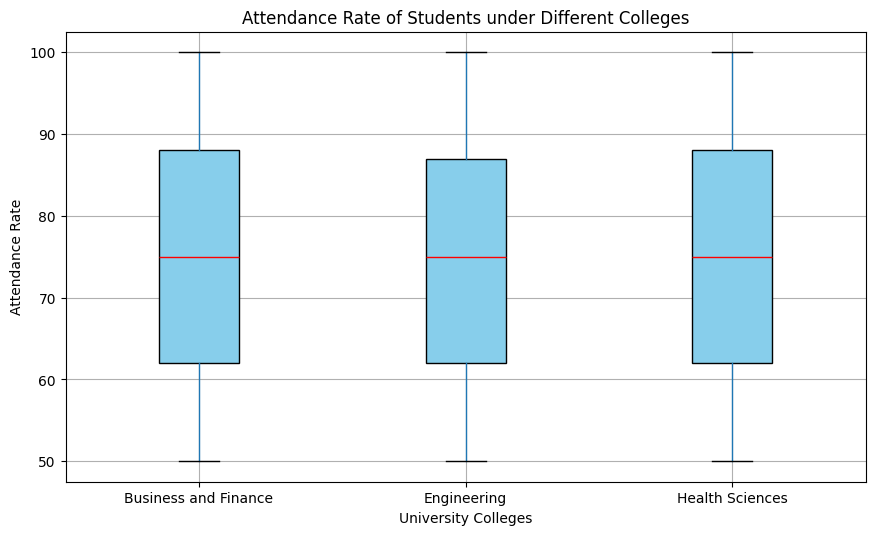

In [49]:
df_active.boxplot(column='AttendRate', by='College', patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Attendance Rate of Students under Different Colleges')
plt.suptitle('')
plt.xlabel('University Colleges')
plt.ylabel('Attendance Rate')
plt.show()

#### ii. College of Engineering

In [50]:
attendrate_eng = df_engineering.groupby('Degree_Program')['AttendRate'].describe()
attendrate_eng

count       mean        std   min   25%   50%   75%    max
Degree_Program                                                            
Aerospace       639.0  74.805947  14.386293  50.0  62.0  75.0  87.0  100.0
Civil           621.0  74.410628  14.830346  50.0  61.0  74.0  87.0  100.0
Computer        676.0  74.550296  14.212738  50.0  63.0  75.0  87.0  100.0
Electrical      665.0  74.666165  14.554110  50.0  63.0  75.0  87.0  100.0
Mechanical      633.0  75.251185  14.769059  50.0  63.0  76.0  88.0  100.0

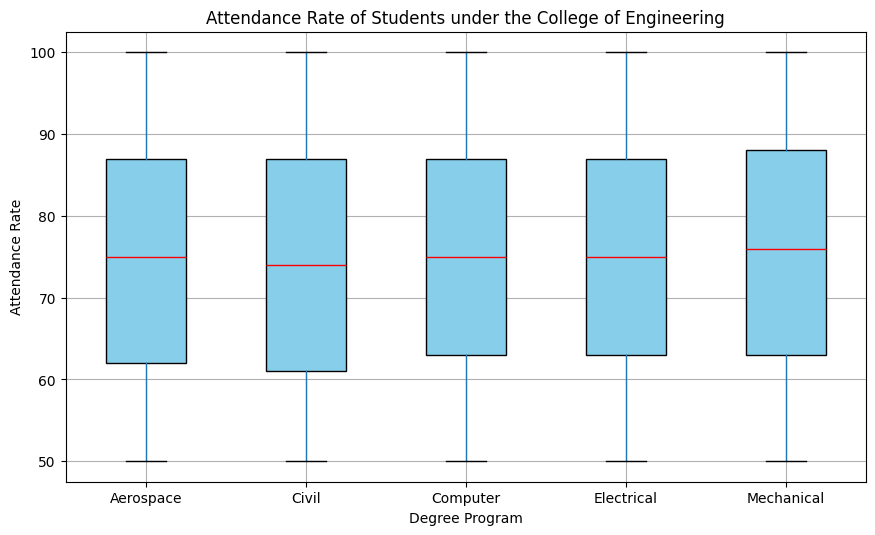

In [51]:
df_engineering.boxplot(column='AttendRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Attendance Rate of Students under the College of Engineering')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [52]:
attendrate_busfin = df_busfinance.groupby('Degree_Program')['AttendRate'].describe()
attendrate_busfin

count       mean        std   min    25%   50%   75%  \
Degree_Program                                                                  
Accountancy              794.0  75.192695  15.120346  50.0  62.00  75.0  88.0   
Business Administration  780.0  75.502564  15.006502  50.0  62.75  75.0  89.0   
Finance                  831.0  75.027677  14.531327  50.0  63.00  75.0  88.0   
Marketing                808.0  75.233911  14.983874  50.0  62.00  76.0  88.0   

                           max  
Degree_Program                  
Accountancy              100.0  
Business Administration  100.0  
Finance                  100.0  
Marketing                100.0

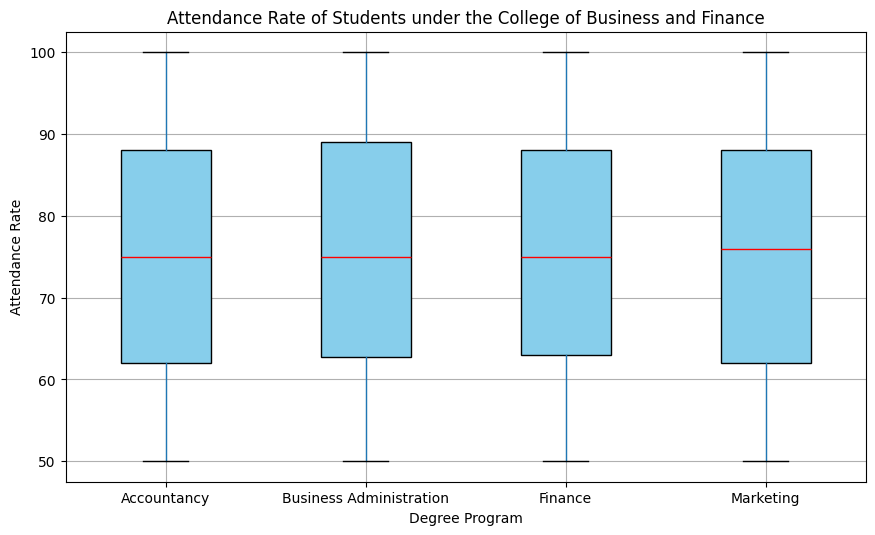

In [53]:
df_busfinance.boxplot(column='AttendRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Attendance Rate of Students under the College of Business and Finance')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [54]:
attendrate_hsci = df_healthsci.groupby('Degree_Program')['AttendRate'].describe()
attendrate_hsci

count       mean        std   min   25%   50%   75%    max
Degree_Program                                                                
Medical Technology  778.0  75.347044  14.755070  50.0  63.0  76.0  88.0  100.0
Nursing             823.0  75.207776  14.338176  50.0  63.0  75.0  88.0  100.0
Pharmacy            814.0  74.964373  15.359968  50.0  62.0  75.0  89.0  100.0
Physical Therapy    767.0  75.006519  14.930604  50.0  62.0  75.0  88.0  100.0

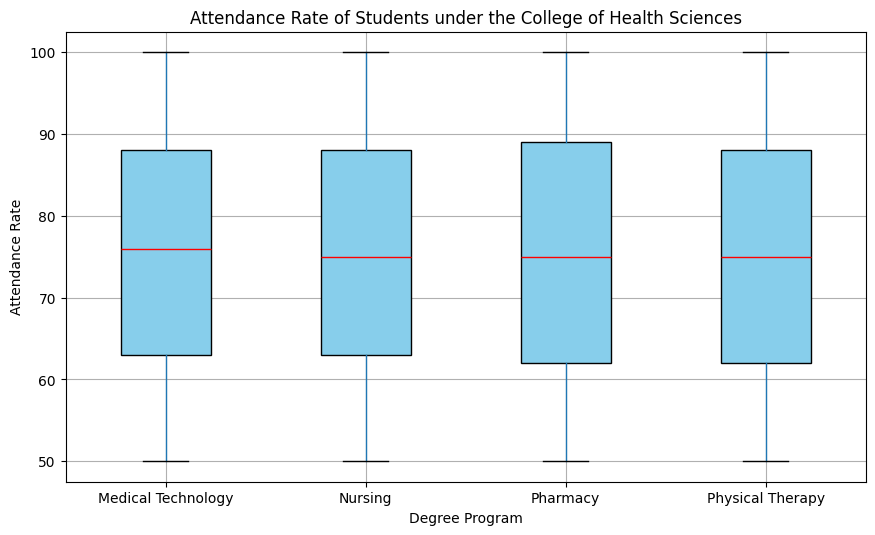

In [55]:
df_healthsci.boxplot(column='AttendRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Attendance Rate of Students under the College of Health Sciences')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=0)
plt.show()

### C. Discussion Participation

#### i. General Population

In [56]:
discusspart_counts = df['Discuss_Part'].value_counts()
discusspart_counts

Discuss_Part
1    5792
0    3837
Name: count, dtype: int64

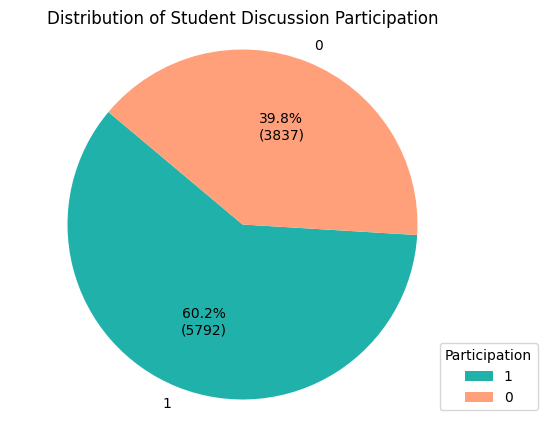

In [57]:
autopct_format = lambda values: (lambda pct: 
                                 f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(6, 5))
plt.pie(discusspart_counts, labels=discusspart_counts.index, 
        autopct=autopct_format(discusspart_counts), 
        colors=['#20B2AA', '#FFA07A'], startangle=140)
plt.title('Distribution of Student Discussion Participation')
plt.axis('equal')
plt.legend(title='Participation', loc='lower right', bbox_to_anchor=(1.15, 0))

plt.show()


#### ii. Participation Levels per Colleges

In [58]:
disclevel_bycollege = df.groupby('College')['Discuss_Part'].value_counts().fillna(0)
disclevel_bycollege

College               Discuss_Part
Business and Finance  1               1932
                      0               1281
Engineering           1               1947
                      0               1287
Health Sciences       1               1913
                      0               1269
Name: count, dtype: int64

In [59]:
disclevel_bycollege = disclevel_bycollege.unstack()
disclevel_bycollege

Discuss_Part             0     1
College                         
Business and Finance  1281  1932
Engineering           1287  1947
Health Sciences       1269  1913

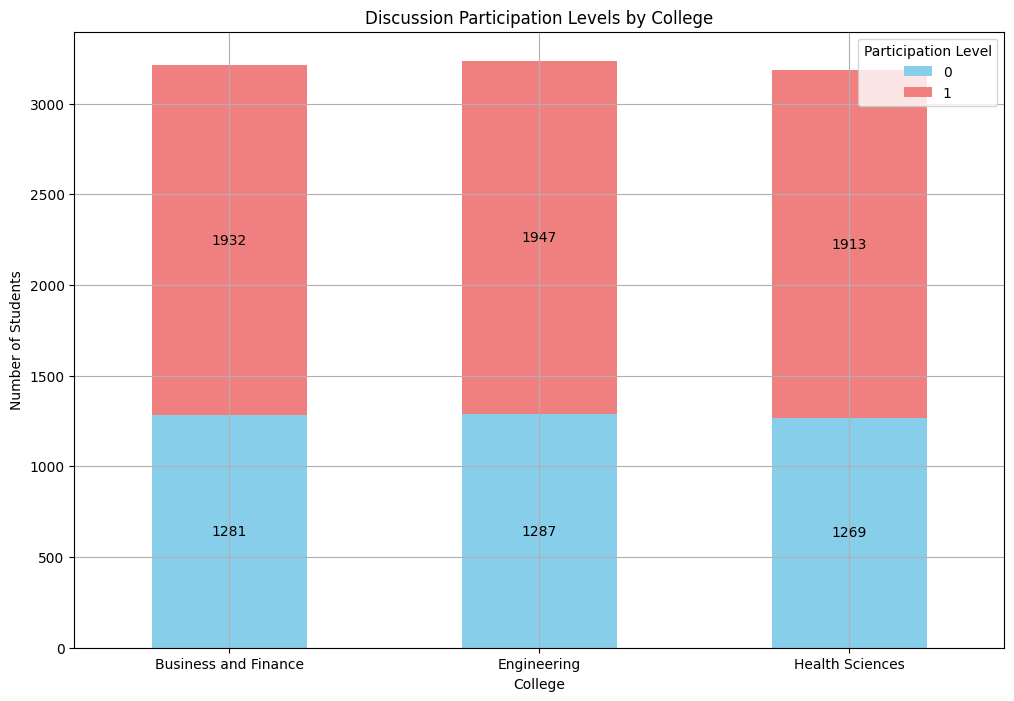

In [60]:
ax = disclevel_bycollege.plot(kind='bar', stacked=True, figsize=(12, 8), 
                              color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('College')
plt.ylabel('Number of Students')
plt.title('Discussion Participation Levels by College')
plt.legend(title='Participation Level')
plt.xticks(rotation=0)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()


#### iii. Participation Levels per Department

##### a. College of Engineering Departments

In [61]:
discussion_eng = df_engineering.groupby(['Degree_Program', 'Discuss_Part']).size().unstack().fillna(0)
discussion_eng

Discuss_Part      0    1
Degree_Program          
Aerospace       263  376
Civil           231  390
Computer        265  411
Electrical      272  393
Mechanical      256  377

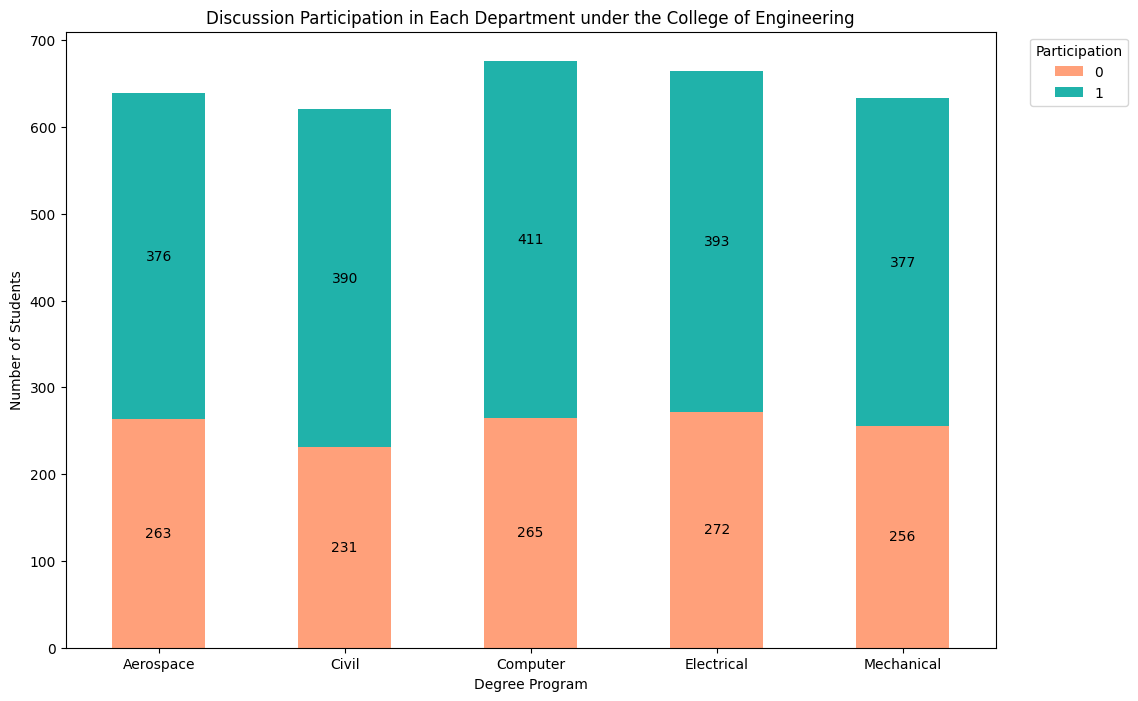

In [62]:
ax = discussion_eng.plot(kind='bar', 
                              stacked=True, 
                              figsize=(12, 8), 
                              color=['#FFA07A', '#20B2AA'])

plt.title('Discussion Participation in Each Department under the College of Engineering')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Participation', loc='upper right', bbox_to_anchor=(1.15, 1))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

##### B. College of Business and Finance Departments

In [63]:
discussion_busfin = df_busfinance.groupby(['Degree_Program', 'Discuss_Part']).size().unstack().fillna(0)
discussion_busfin

Discuss_Part               0    1
Degree_Program                   
Accountancy              341  453
Business Administration  327  453
Finance                  310  521
Marketing                303  505

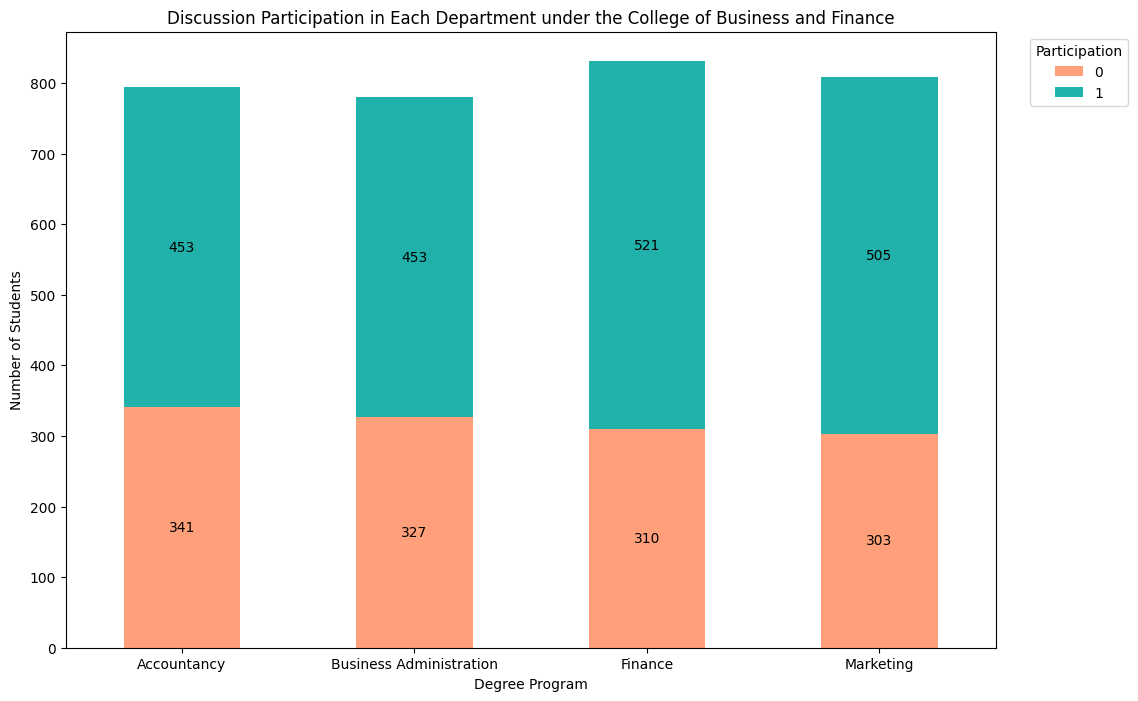

In [64]:
ax = discussion_busfin.plot(kind='bar', 
                              stacked=True, 
                              figsize=(12, 8), 
                              color=['#FFA07A', '#20B2AA'])

plt.title('Discussion Participation in Each Department under the College of Business and Finance')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Participation', loc='upper right', bbox_to_anchor=(1.15, 1))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

##### c. College of Health Sciences Departments

In [65]:
discussion_healthsci = df_healthsci.groupby(['Degree_Program', 'Discuss_Part']).size().unstack().fillna(0)
discussion_healthsci

Discuss_Part          0    1
Degree_Program              
Medical Technology  319  459
Nursing             324  499
Pharmacy            343  471
Physical Therapy    283  484

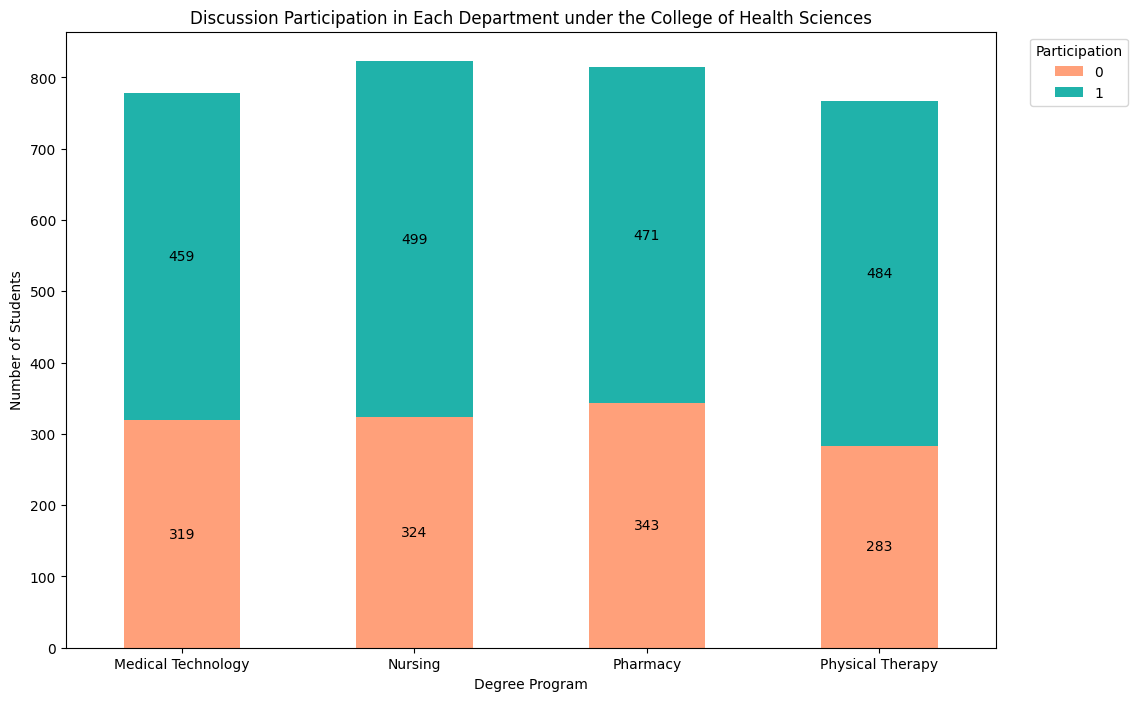

In [66]:
ax = discussion_healthsci.plot(kind='bar', 
                              stacked=True, 
                              figsize=(12, 8), 
                              color=['#FFA07A', '#20B2AA'])

plt.title('Discussion Participation in Each Department under the College of Health Sciences')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Participation', loc='upper right', bbox_to_anchor=(1.15, 1))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

### D. Assignment Rate Performance

#### i. General Population

In [67]:
assignrate_genpop = df_active.groupby('College')['AssignRate'].describe()
assignrate_genpop

count       mean        std   min   25%   50%   75%  \
College                                                                      
Business and Finance  3213.0  74.730470  14.700482  50.0  62.0  75.0  88.0   
Engineering           3234.0  75.017625  14.781071  50.0  62.0  75.0  88.0   
Health Sciences       3182.0  75.125393  14.487200  50.0  63.0  75.0  87.0   

                        max  
College                      
Business and Finance  100.0  
Engineering           100.0  
Health Sciences       100.0

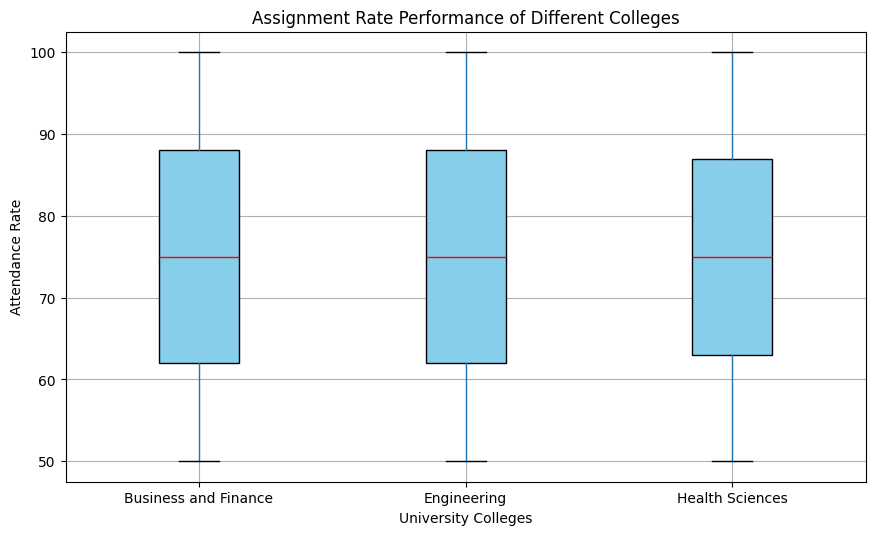

In [68]:
df_active.boxplot(column='AssignRate', by='College', patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Assignment Rate Performance of Different Colleges')
plt.suptitle('')
plt.xlabel('University Colleges')
plt.ylabel('Attendance Rate')
plt.show()

#### ii. College of Engineering

In [69]:
assignrate_eng = df_engineering.groupby('Degree_Program')['AssignRate'].describe()
assignrate_eng

count       mean        std   min    25%   50%   75%    max
Degree_Program                                                             
Aerospace       639.0  74.660407  14.814597  50.0  62.00  74.0  88.0  100.0
Civil           621.0  75.495974  14.601328  50.0  62.00  77.0  88.0  100.0
Computer        676.0  75.171598  14.530382  50.0  62.75  75.0  88.0  100.0
Electrical      665.0  75.055639  15.019111  50.0  62.00  75.0  88.0  100.0
Mechanical      633.0  74.704581  14.965242  50.0  62.00  74.0  88.0  100.0

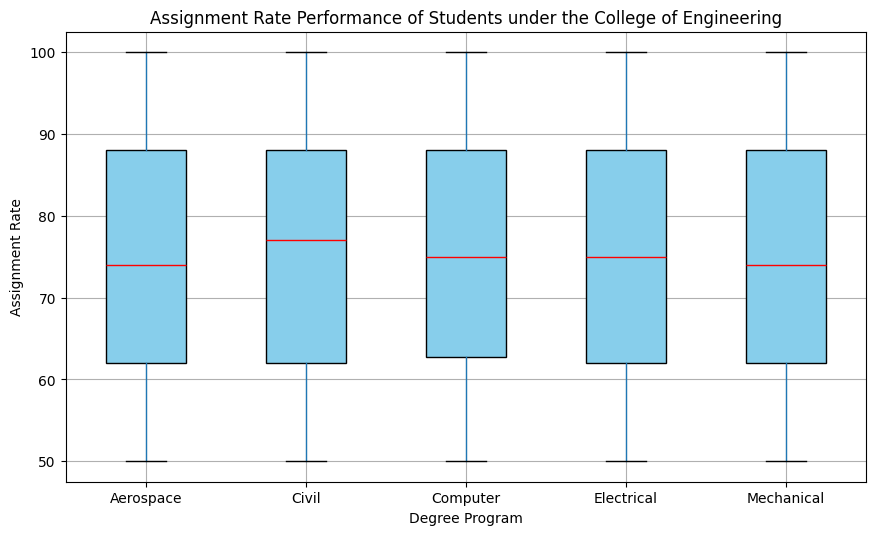

In [70]:
df_engineering.boxplot(column='AssignRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Assignment Rate Performance of Students under the College of Engineering')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Assignment Rate')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [71]:
assignrate_busfin = df_busfinance.groupby('Degree_Program')['AssignRate'].describe()
assignrate_busfin

count       mean        std   min   25%   50%   75%  \
Degree_Program                                                                 
Accountancy              794.0  74.974811  14.759676  50.0  62.0  75.0  88.0   
Business Administration  780.0  74.692308  15.021600  50.0  62.0  75.0  88.0   
Finance                  831.0  74.709988  14.431772  50.0  63.0  74.0  87.0   
Marketing                808.0  74.548267  14.626626  50.0  62.0  75.0  87.0   

                           max  
Degree_Program                  
Accountancy              100.0  
Business Administration  100.0  
Finance                  100.0  
Marketing                100.0

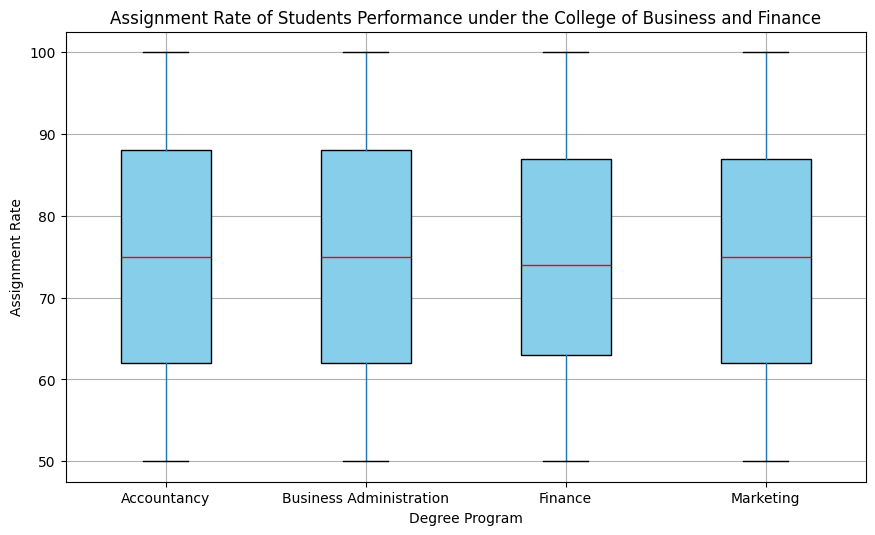

In [72]:
df_busfinance.boxplot(column='AssignRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Assignment Rate of Students Performance under the College of Business and Finance')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Assignment Rate')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [73]:
assignrate_healthsci = df_healthsci.groupby('Degree_Program')['AssignRate'].describe()
assignrate_healthsci

count       mean        std   min    25%   50%    75%  \
Degree_Program                                                              
Medical Technology  778.0  74.818766  14.669304  50.0  61.25  75.0  87.75   
Nursing             823.0  76.249089  13.989131  50.0  65.00  77.0  87.00   
Pharmacy            814.0  74.389435  14.648130  50.0  62.00  74.0  87.00   
Physical Therapy    767.0  75.011734  14.612260  50.0  63.00  75.0  88.00   

                      max  
Degree_Program             
Medical Technology  100.0  
Nursing             100.0  
Pharmacy            100.0  
Physical Therapy    100.0

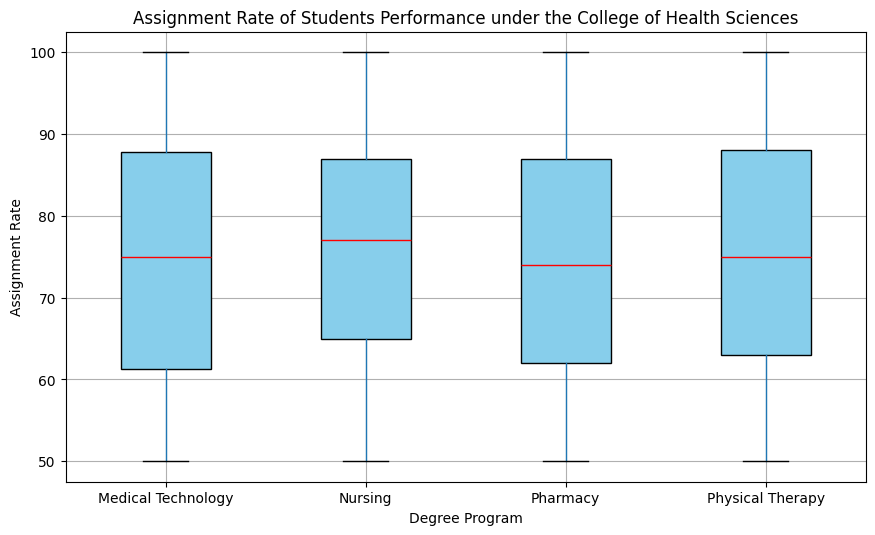

In [74]:
df_healthsci.boxplot(column='AssignRate', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Assignment Rate of Students Performance under the College of Health Sciences')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Assignment Rate')
plt.xticks(rotation=0)
plt.show()

### E. Examination Performance

#### i. General Population

In [75]:
examrate_genpop = df_active.groupby('College')['Exam_Score(%)'].describe()
examrate_genpop

count       mean        std        min        25%  \
College                                                                    
Business and Finance  3213.0  56.487742  12.893114  21.500000  47.304450   
Engineering           3234.0  56.214536  12.474877  21.500000  47.575388   
Health Sciences       3182.0  56.334669  12.812228  21.531086  47.600000   

                            50%        75%        max  
College                                                
Business and Finance  56.336670  65.809750  92.166317  
Engineering           56.400000  64.962444  95.600000  
Health Sciences       56.581792  65.233401  94.400000

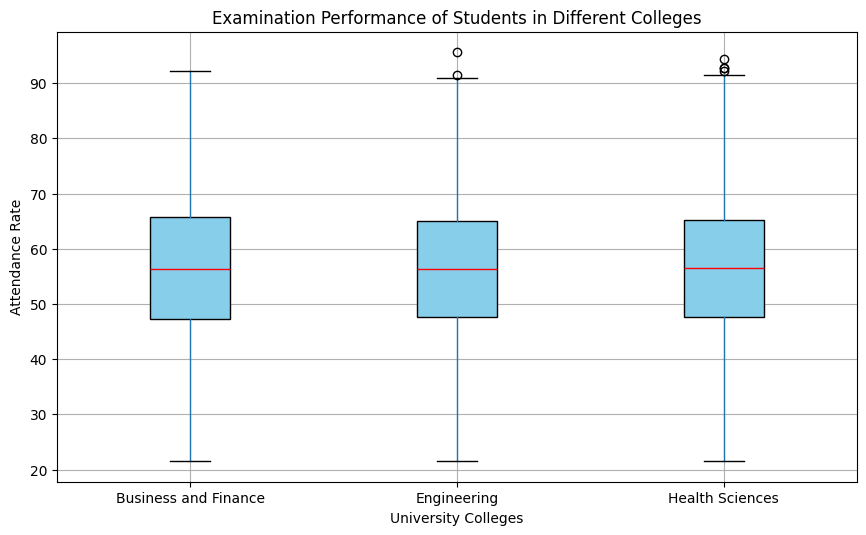

In [76]:
df_active.boxplot(column='Exam_Score(%)', by='College', patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Examination Performance of Students in Different Colleges')
plt.suptitle('')
plt.xlabel('University Colleges')
plt.ylabel('Attendance Rate')
plt.show()

#### ii. College of Engineering

In [77]:
examrate_eng = df_engineering.groupby('Degree_Program')['Exam_Score(%)'].describe()
examrate_eng

count       mean        std        min        25%        50%  \
Degree_Program                                                                 
Aerospace       639.0  55.712409  12.597887  23.470999  47.023383  56.434477   
Civil           621.0  55.438764  12.311736  23.776344  46.718563  55.800000   
Computer        676.0  56.312236  11.874784  23.800000  48.095554  56.801351   
Electrical      665.0  56.766135  12.833270  26.900000  47.595148  56.551952   
Mechanical      633.0  56.798668  12.728680  21.500000  48.382260  56.339461   

                      75%        max  
Degree_Program                        
Aerospace       64.489832  91.400000  
Civil           64.639326  86.307133  
Computer        64.768200  90.000000  
Electrical      65.400000  95.600000  
Mechanical      65.984647  88.703195

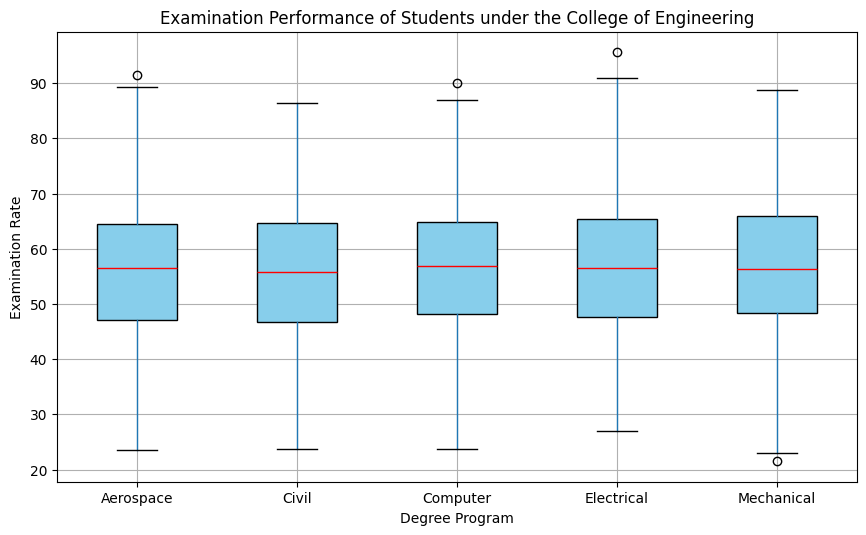

In [78]:
df_engineering.boxplot(column='Exam_Score(%)', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Examination Performance of Students under the College of Engineering')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Examination Rate')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [79]:
examrate_busfin = df_busfinance.groupby('Degree_Program')['Exam_Score(%)'].describe()
examrate_busfin

count       mean        std        min        25%  \
Degree_Program                                                               
Accountancy              794.0  55.927809  13.438717  22.002165  46.197739   
Business Administration  780.0  56.159632  12.678498  21.500000  47.156411   
Finance                  831.0  56.850878  12.608372  22.400000  47.431557   
Marketing                808.0  56.981241  12.833809  21.800000  48.589532   

                               50%        75%        max  
Degree_Program                                            
Accountancy              56.019683  66.170647  92.166317  
Business Administration  55.729407  65.115666  89.600000  
Finance                  57.160151  66.055224  91.088526  
Marketing                56.611740  66.225390  88.000000

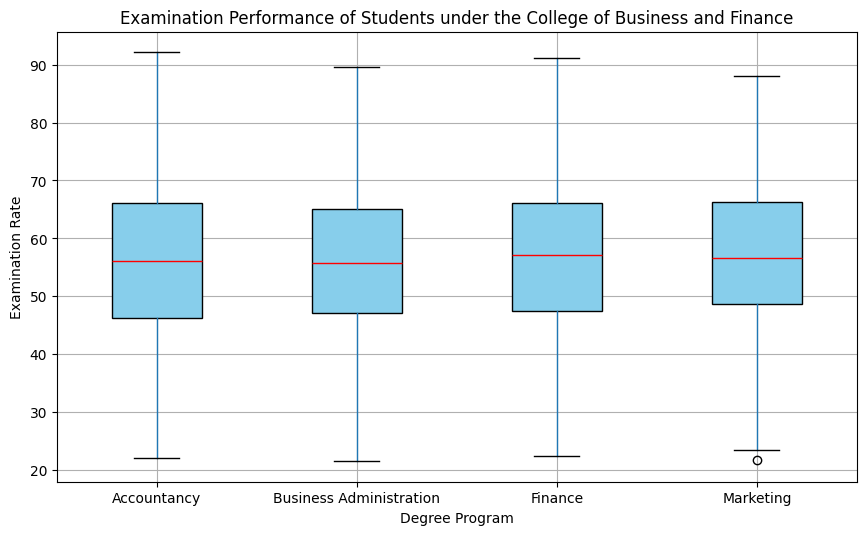

In [80]:
df_busfinance.boxplot(column='Exam_Score(%)', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Examination Performance of Students under the College of Business and Finance')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Examination Rate')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [81]:
examrate_healthsci = df_healthsci.groupby('Degree_Program')['Exam_Score(%)'].describe()
examrate_healthsci

count       mean        std        min        25%  \
Degree_Program                                                          
Medical Technology  778.0  56.379737  12.936785  23.499193  47.800000   
Nursing             823.0  56.772069  12.574556  23.000000  47.762511   
Pharmacy            814.0  55.532188  12.850521  21.531086  46.616156   
Physical Therapy    767.0  56.671273  12.882906  21.600000  48.073713   

                          50%        75%        max  
Degree_Program                                       
Medical Technology  56.784512  65.691591  92.252801  
Nursing             57.155907  65.688376  92.800000  
Pharmacy            55.689362  64.600000  88.000000  
Physical Therapy    56.632103  65.193376  94.400000

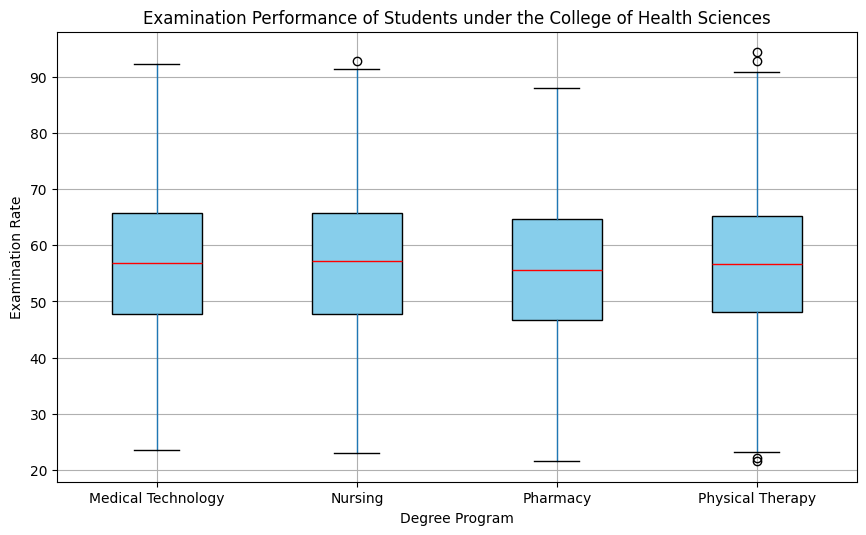

In [82]:
df_healthsci.boxplot(column='Exam_Score(%)', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Examination Performance of Students under the College of Health Sciences')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Examination Rate')
plt.xticks(rotation=0)
plt.show()

### F. Course Completion Frequency

#### i. General Population

In [83]:
coursecomp_genpop = df_active['Courses_Comp'].value_counts().sort_index()
coursecomp_genpop.index = coursecomp_genpop.index.astype(int)
coursecomp_genpop

Courses_Comp
0     506
1     491
2     457
3     419
4     451
5     487
6     447
7     410
8     472
9     449
10    437
11    439
12    458
13    434
14    439
15    470
16    455
17    502
18    473
19    458
20    475
Name: count, dtype: int64

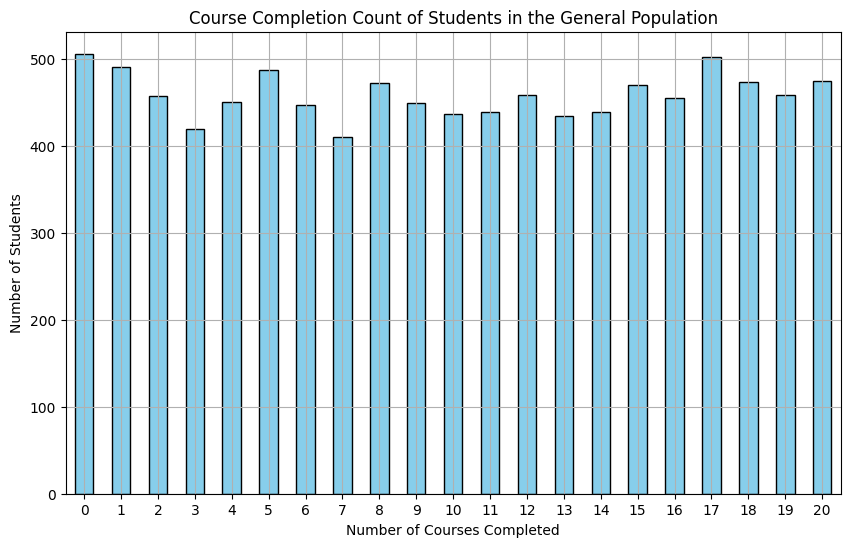

In [84]:
plt.figure(figsize=(10, 6))
coursecomp_genpop.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Courses Completed')
plt.ylabel('Number of Students')
plt.title('Course Completion Count of Students in the General Population')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

#### ii. College of Engineering

In [85]:
coursecomp_eng = df_engineering['Courses_Comp'].value_counts().sort_index()
coursecomp_eng.index = coursecomp_eng.index.astype(int)
coursecomp_eng

Courses_Comp
0     161
1     171
2     143
3     157
4     149
5     168
6     151
7     132
8     168
9     143
10    142
11    150
12    148
13    148
14    151
15    161
16    175
17    159
18    154
19    138
20    165
Name: count, dtype: int64

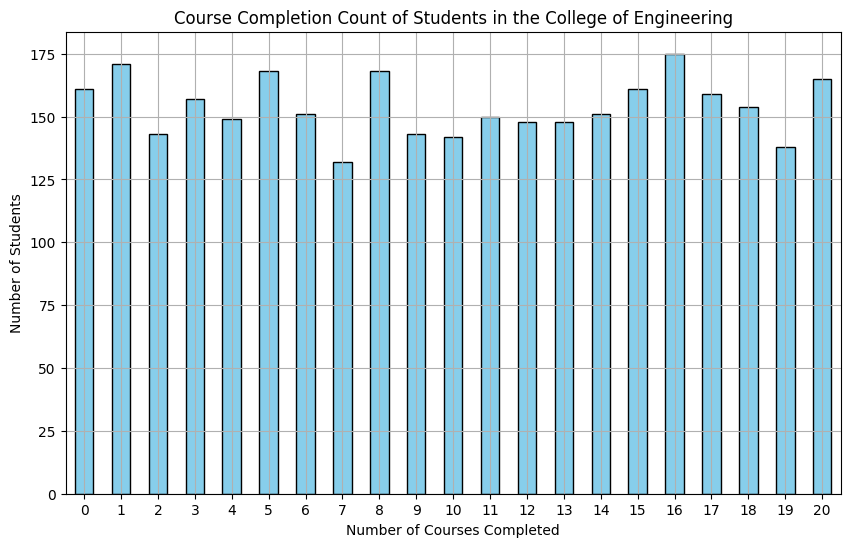

In [86]:
plt.figure(figsize=(10, 6))
coursecomp_eng.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Courses Completed')
plt.ylabel('Number of Students')
plt.title('Course Completion Count of Students in the College of Engineering')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [87]:
coursecomp_busfin = df_busfinance['Courses_Comp'].value_counts().sort_index()
coursecomp_busfin.index = coursecomp_busfin.index.astype(int)
coursecomp_busfin

Courses_Comp
0     198
1     149
2     153
3     128
4     142
5     160
6     149
7     125
8     170
9     157
10    136
11    144
12    146
13    142
14    155
15    161
16    150
17    176
18    158
19    161
20    153
Name: count, dtype: int64

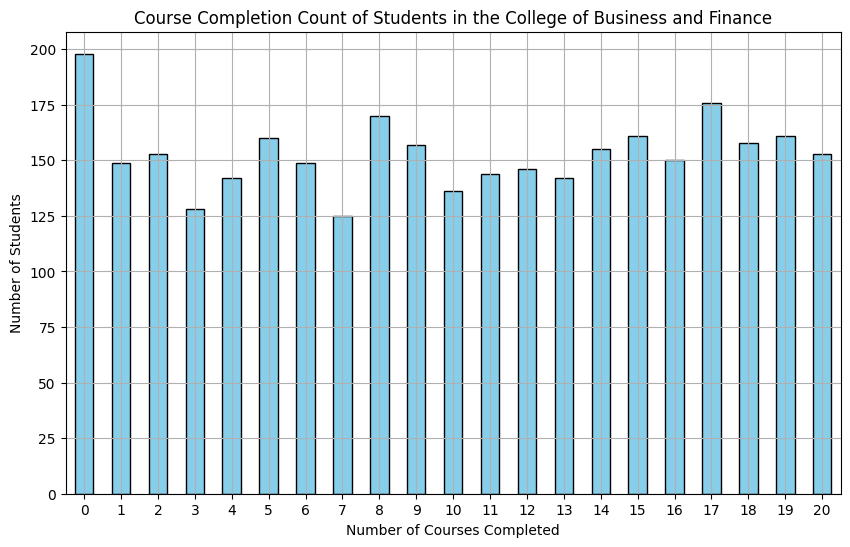

In [88]:
plt.figure(figsize=(10, 6))
coursecomp_busfin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Courses Completed')
plt.ylabel('Number of Students')
plt.title('Course Completion Count of Students in the College of Business and Finance')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [89]:
coursecomp_healthsci = df_healthsci['Courses_Comp'].value_counts().sort_index()
coursecomp_healthsci.index = coursecomp_healthsci.index.astype(int)
coursecomp_healthsci

Courses_Comp
0     147
1     171
2     161
3     134
4     160
5     159
6     147
7     153
8     134
9     149
10    159
11    145
12    164
13    144
14    133
15    148
16    130
17    167
18    161
19    159
20    157
Name: count, dtype: int64

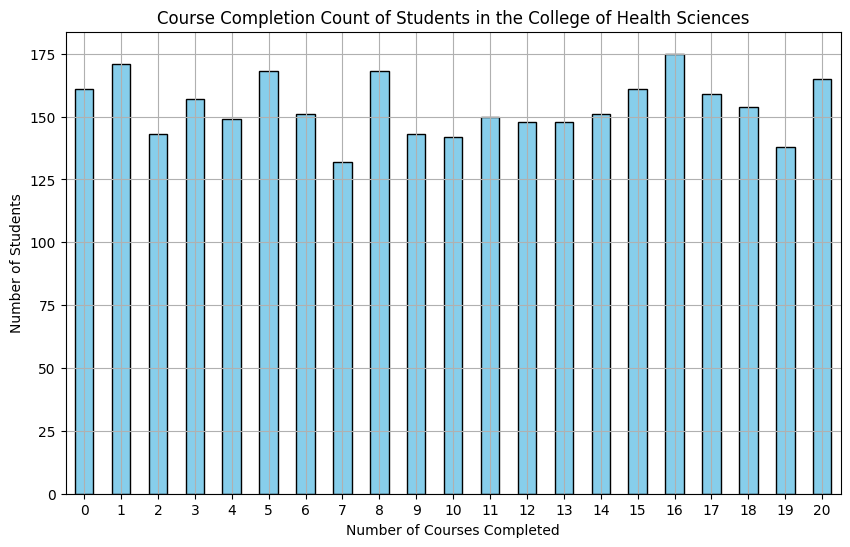

In [90]:
plt.figure(figsize=(10, 6))
coursecomp_eng.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Courses Completed')
plt.ylabel('Number of Students')
plt.title('Course Completion Count of Students in the College of Health Sciences')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

## III. Behavior-Based Demographics

### A. Learning Style Preferences

#### i. General Population

In [91]:
learning_style_counts = df_active['Learning_Style'].value_counts().sort_values(ascending=False)
learning_style_counts

Learning_Style
Kinesthetic        2423
Visual             2420
Reading/Writing    2411
Auditory           2375
Name: count, dtype: int64

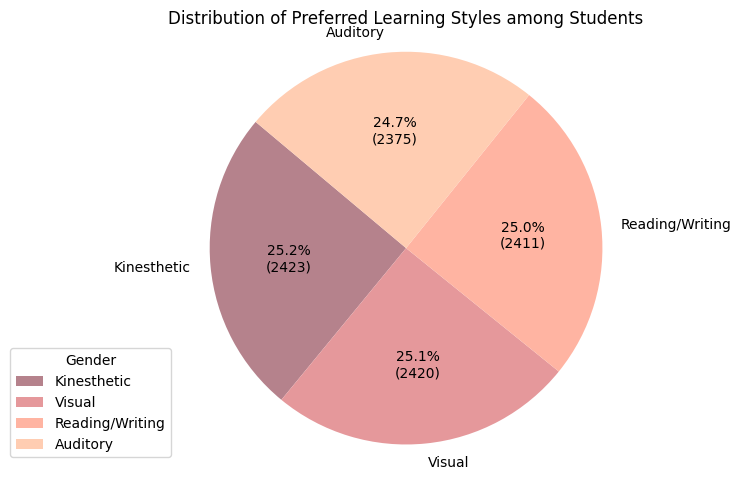

In [92]:
autopct_format = lambda values:(lambda pct: f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(8, 8))
plt.pie(learning_style_counts, labels=learning_style_counts.index,
        autopct=autopct_format(learning_style_counts), 
        colors=['#B5828C', '#E5989B', '#FFB4A2', '#FFCDB2'], startangle=140)
plt.title('Distribution of Preferred Learning Styles among Students')
plt.axis('equal')
plt.subplots_adjust(top=0.65)
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.15, 0)) 

plt.show()

#### ii. College of Engineering

In [93]:
lstyle_eng = df_engineering['Learning_Style'].value_counts().sort_values(ascending=False)
lstyle_eng

Learning_Style
Kinesthetic        865
Visual             801
Auditory           794
Reading/Writing    774
Name: count, dtype: int64

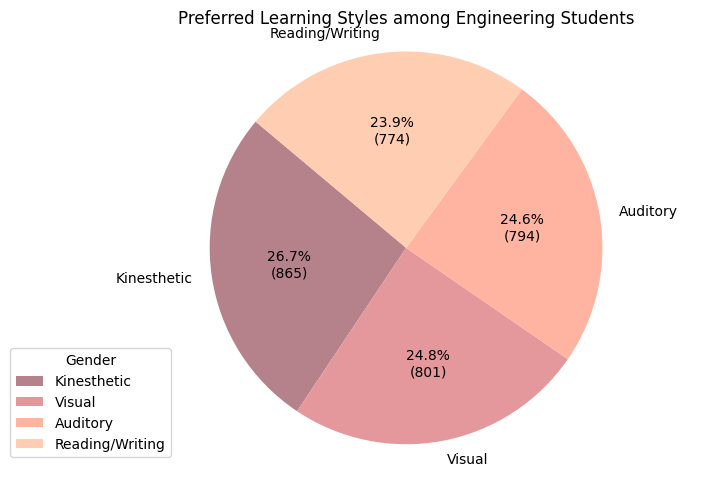

In [94]:
autopct_format = lambda values:(lambda pct: f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(8, 8))
plt.pie(lstyle_eng, labels=lstyle_eng.index,
        autopct=autopct_format(lstyle_eng), 
        colors=['#B5828C', '#E5989B', '#FFB4A2', '#FFCDB2'], startangle=140)
plt.title('Preferred Learning Styles among Engineering Students')
plt.axis('equal')
plt.subplots_adjust(top=0.65)
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.15, 0)) 

plt.show()

#### iii. College of Business and Finance

In [95]:
lstyle_busfin = df_busfinance['Learning_Style'].value_counts().sort_values(ascending=False)
lstyle_busfin

Learning_Style
Reading/Writing    828
Kinesthetic        808
Visual             799
Auditory           778
Name: count, dtype: int64

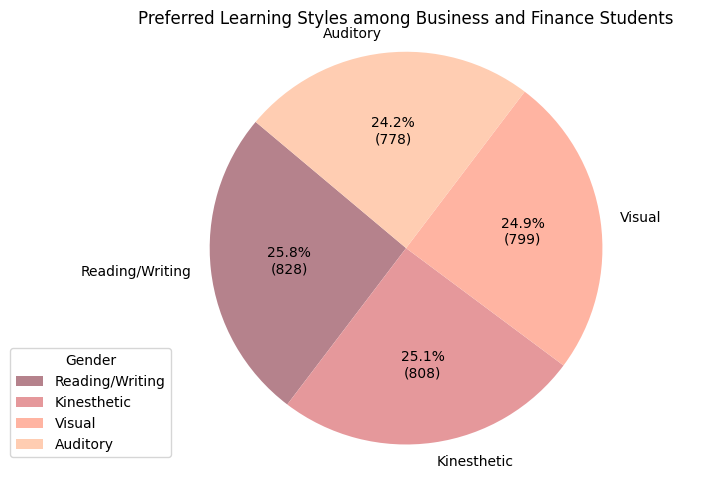

In [96]:
autopct_format = lambda values:(lambda pct: f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(8, 8))
plt.pie(lstyle_busfin, labels=lstyle_busfin.index,
        autopct=autopct_format(lstyle_busfin), 
        colors=['#B5828C', '#E5989B', '#FFB4A2', '#FFCDB2'], startangle=140)
plt.title('Preferred Learning Styles among Business and Finance Students')
plt.axis('equal')
plt.subplots_adjust(top=0.65)
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.15, 0)) 

plt.show()

#### iv. College of Health Sciences

In [97]:
lstyle_healthsci = df_healthsci['Learning_Style'].value_counts().sort_values(ascending=False)
lstyle_healthsci

Learning_Style
Visual             820
Reading/Writing    809
Auditory           803
Kinesthetic        750
Name: count, dtype: int64

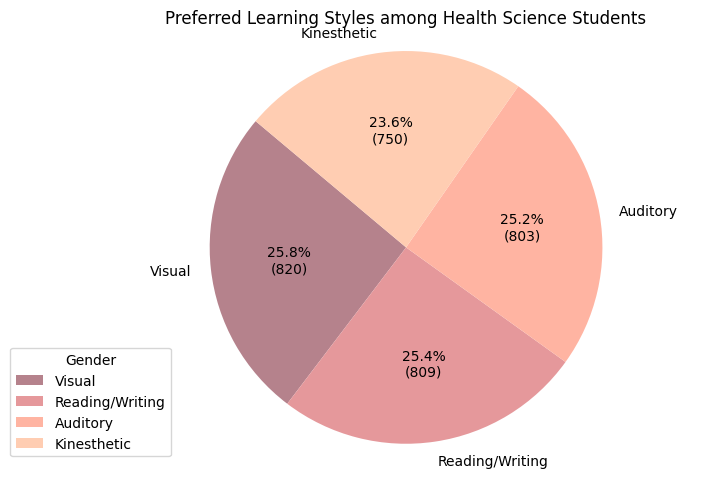

In [98]:
autopct_format = lambda values:(lambda pct: f'{pct:.1f}%\n({int(round(pct * sum(values) / 100.0))})')

plt.figure(figsize=(8, 8))
plt.pie(lstyle_healthsci, labels=lstyle_healthsci.index,
        autopct=autopct_format(lstyle_healthsci), 
        colors=['#B5828C', '#E5989B', '#FFB4A2', '#FFCDB2'], startangle=140)
plt.title('Preferred Learning Styles among Health Science Students')
plt.axis('equal')
plt.subplots_adjust(top=0.65)
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.15, 0)) 

plt.show()

### B. Technology Use

#### i. General Population

In [99]:
techuse_counts = df_active['TechUse'].value_counts().sort_values(ascending=False)
techuse_counts

TechUse
Yes    6755
No     2874
Name: count, dtype: int64

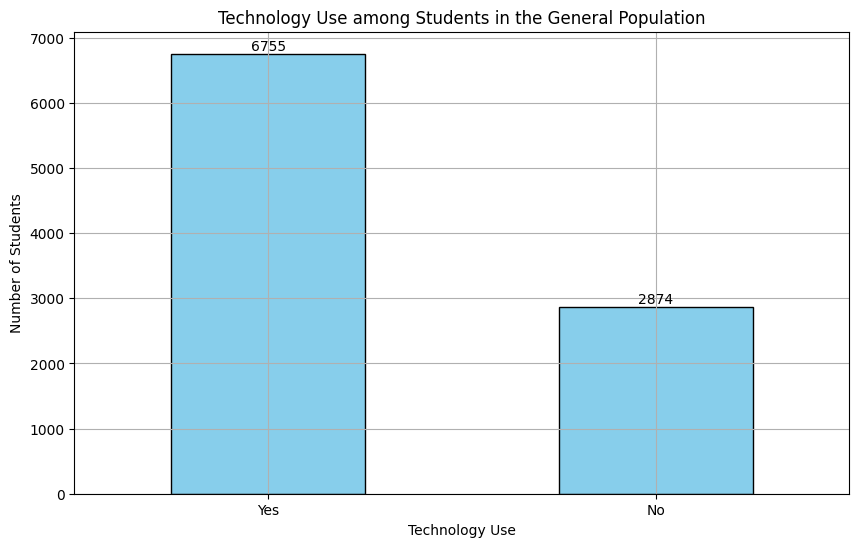

In [100]:
plt.figure(figsize=(10, 6))
ax = techuse_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Technology Use')
plt.ylabel('Number of Students')
plt.title('Technology Use among Students in the General Population')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

#### ii. Technology Use per College

In [101]:
techuse_by_college = df_active.groupby(['College', 'TechUse']).size().unstack().fillna(0)
techuse_by_college = techuse_by_college[['Yes', 'No']]
techuse_by_college

TechUse                Yes   No
College                        
Business and Finance  2265  948
Engineering           2275  959
Health Sciences       2215  967

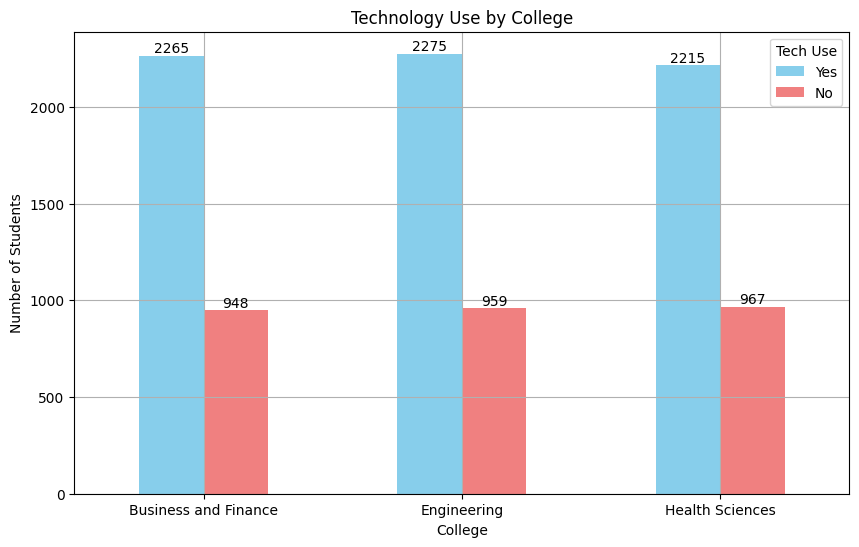

In [102]:
ax = techuse_by_college.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('College')
plt.ylabel('Number of Students')
plt.title('Technology Use by College')
plt.legend(title='Tech Use')
plt.xticks(rotation=0)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

#### iii. Technology Use per Department

##### a. College of Engineering

In [103]:
techuse_eng = df_engineering.groupby(['Degree_Program', 'TechUse']).size().unstack().fillna(0)
techuse_eng = techuse_eng[['Yes', 'No']]
techuse_eng

TechUse         Yes   No
Degree_Program          
Aerospace       431  208
Civil           438  183
Computer        478  198
Electrical      480  185
Mechanical      448  185

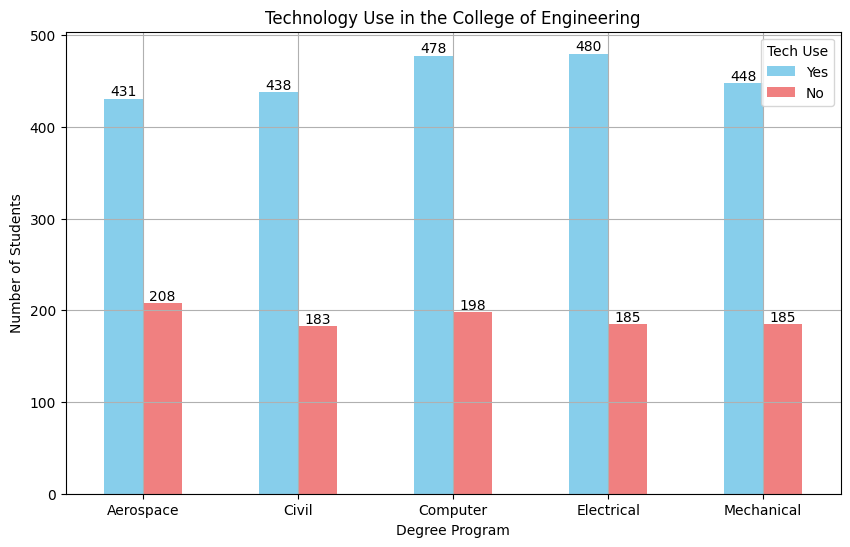

In [104]:
ax = techuse_eng.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.title('Technology Use in the College of Engineering')
plt.legend(title='Tech Use')
plt.xticks(rotation=0)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')


plt.show()

##### b. College of Business and Finance

In [105]:
techuse_busfin = df_busfinance.groupby(['Degree_Program', 'TechUse']).size().unstack().fillna(0)
techuse_busfin = techuse_busfin[['Yes', 'No']]
techuse_busfin

TechUse                  Yes   No
Degree_Program                   
Accountancy              540  254
Business Administration  542  238
Finance                  604  227
Marketing                579  229

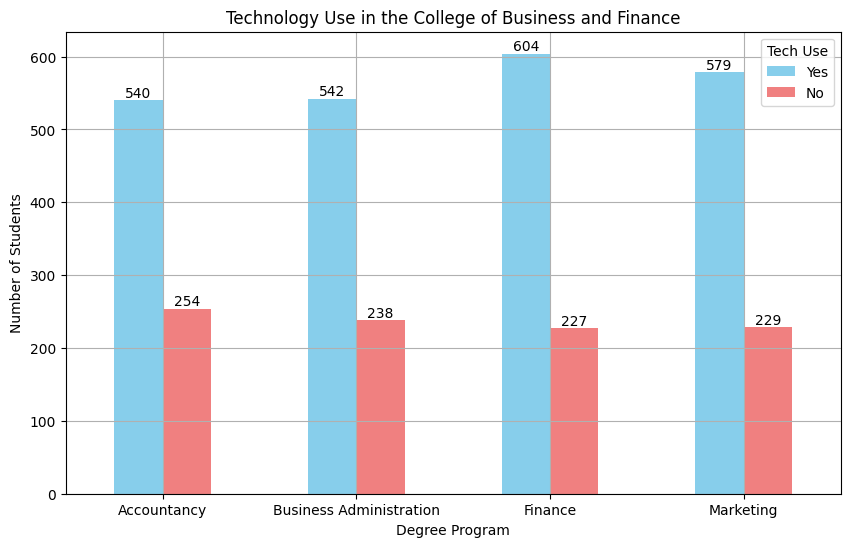

In [106]:
ax = techuse_busfin.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.title('Technology Use in the College of Business and Finance')
plt.legend(title='Tech Use')
plt.xticks(rotation=0)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

##### c. College of Health Sciences

In [107]:
techuse_healthsci = df_healthsci.groupby(['Degree_Program', 'TechUse']).size().unstack().fillna(0)
techuse_healthsci = techuse_healthsci[['Yes', 'No']]
techuse_healthsci

TechUse             Yes   No
Degree_Program              
Medical Technology  539  239
Nursing             578  245
Pharmacy            571  243
Physical Therapy    527  240

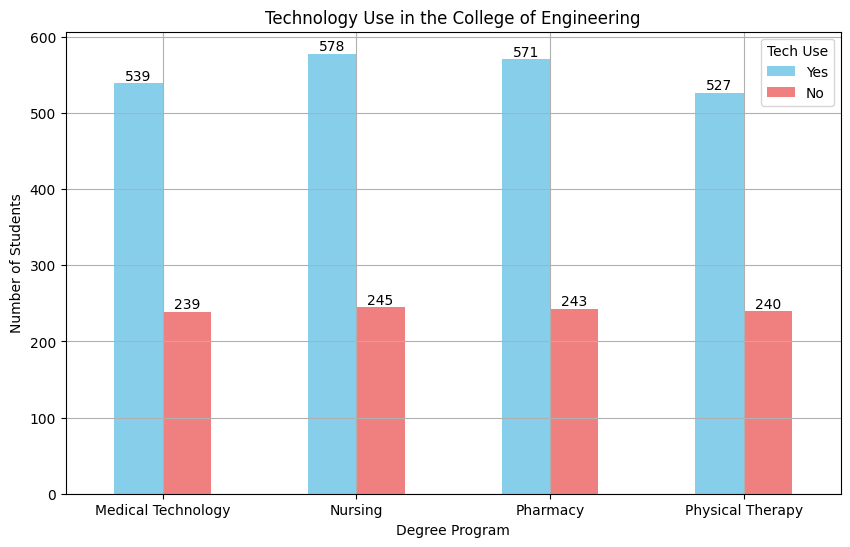

In [108]:
ax = techuse_healthsci.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.title('Technology Use in the College of Engineering')
plt.legend(title='Tech Use')
plt.xticks(rotation=0)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

### C. Stress Level

#### i. General Population

In [109]:
stresslevel_counts = df_active['StressLevel'].value_counts().sort_index(ascending=True)
stresslevel_counts

StressLevel
1     1630
2      835
3      970
4      954
5      890
6      931
7      910
8      802
9      667
10    1040
Name: count, dtype: int64

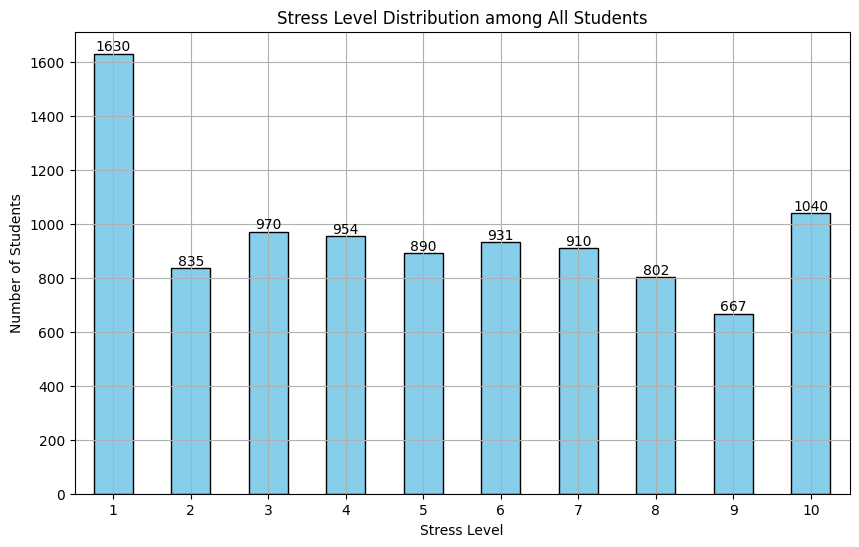

In [110]:
plt.figure(figsize=(10, 6))
ax = stresslevel_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Stress Level Distribution among All Students')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

#### ii. College of Engineering

In [111]:
stresslevel_eng = df_engineering.groupby(['Degree_Program', 'StressLevel']).size().unstack().fillna(0)
stresslevel_eng

StressLevel      1   2   3   4   5   6   7   8   9   10
Degree_Program                                         
Aerospace       116  47  62  69  55  52  67  57  38  76
Civil            88  47  63  65  56  60  57  48  63  74
Computer        100  61  67  64  75  61  59  73  43  73
Electrical      120  65  69  58  58  71  63  49  43  69
Mechanical      103  71  63  63  55  66  58  54  38  62

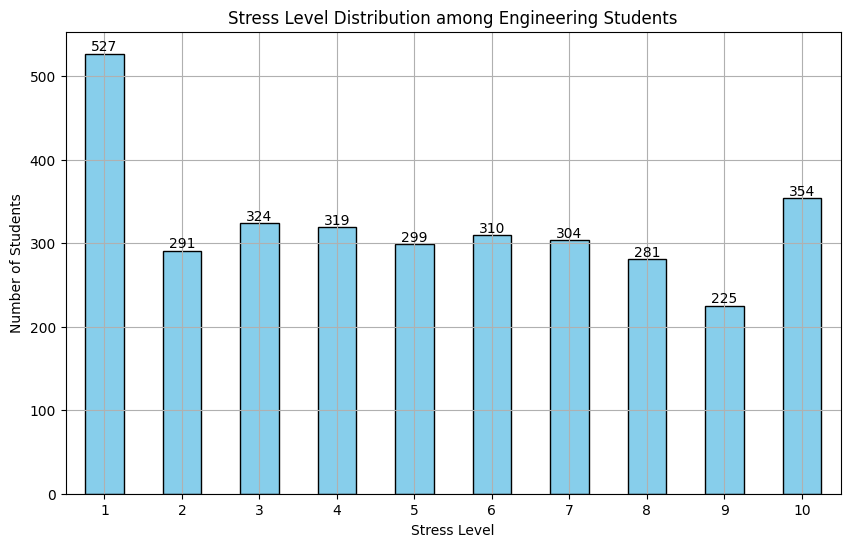

In [112]:
plt.figure(figsize=(10, 6))
ax = stresslevel_eng.sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Stress Level Distribution among Engineering Students')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


#### iii. College of Business and Finance

In [113]:
stresslevel_busfin = df_busfinance.groupby(['Degree_Program', 'StressLevel']).size().unstack().fillna(0)
stresslevel_busfin

StressLevel               1   2   3   4   5   6   7   8   9   10
Degree_Program                                                  
Accountancy              152  61  80  60  75  71  72  72  57  94
Business Administration  121  71  71  89  82  82  66  72  44  82
Finance                  146  85  76  72  68  75  83  65  70  91
Marketing                137  68  97  89  72  75  83  54  57  76

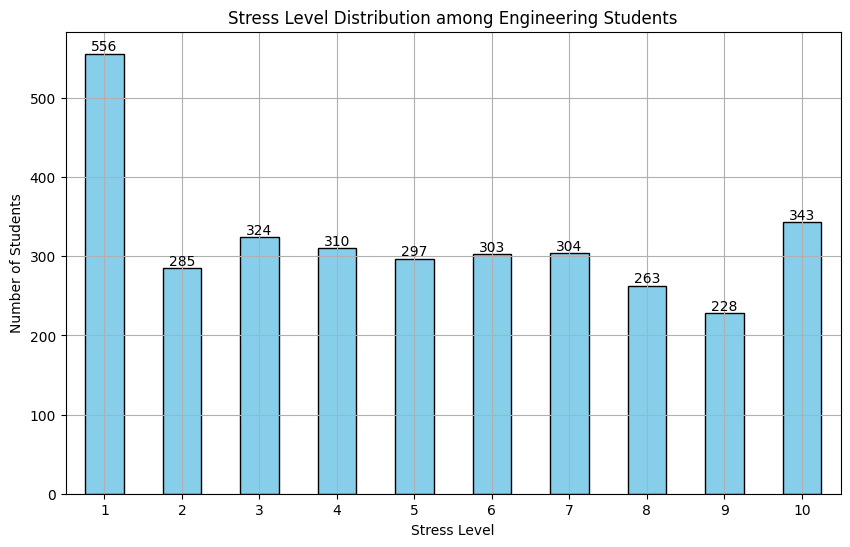

In [114]:
plt.figure(figsize=(10, 6))
ax = stresslevel_busfin.sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Stress Level Distribution among Engineering Students')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


#### iv. College of Health Sciences

In [115]:
stresslevel_healthsci = df_healthsci.groupby(['Degree_Program', 'StressLevel']).size().unstack().fillna(0)
stresslevel_healthsci

StressLevel          1   2   3   4   5   6   7   8   9   10
Degree_Program                                             
Medical Technology  142  79  69  70  74  84  73  58  50  79
Nursing             141  54  97  75  81  87  81  77  42  88
Pharmacy            141  66  79  92  76  77  76  58  54  95
Physical Therapy    123  60  77  88  63  70  72  65  68  81

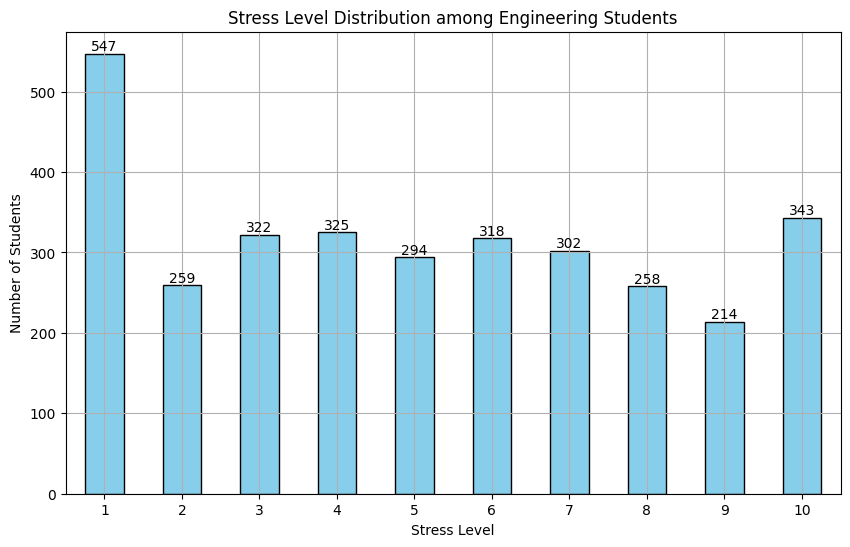

In [116]:
plt.figure(figsize=(10, 6))
ax = stresslevel_healthsci.sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Stress Level Distribution among Engineering Students')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


### D. Social Media Screentime (Hours)

#### i. General Population

In [117]:
socmedia_bycollege = df.groupby('College')['SocMediaHrs']
socmedia_bycollege.describe()

count      mean       std  min  25%  50%  75%   max
College                                                                   
Business and Finance  3213.0  3.513539  1.934856  0.0  2.0  3.0  5.0  10.0
Engineering           3234.0  3.528448  1.929622  0.0  2.0  4.0  5.0  10.0
Health Sciences       3182.0  3.519799  1.947298  0.0  2.0  3.0  5.0  10.0

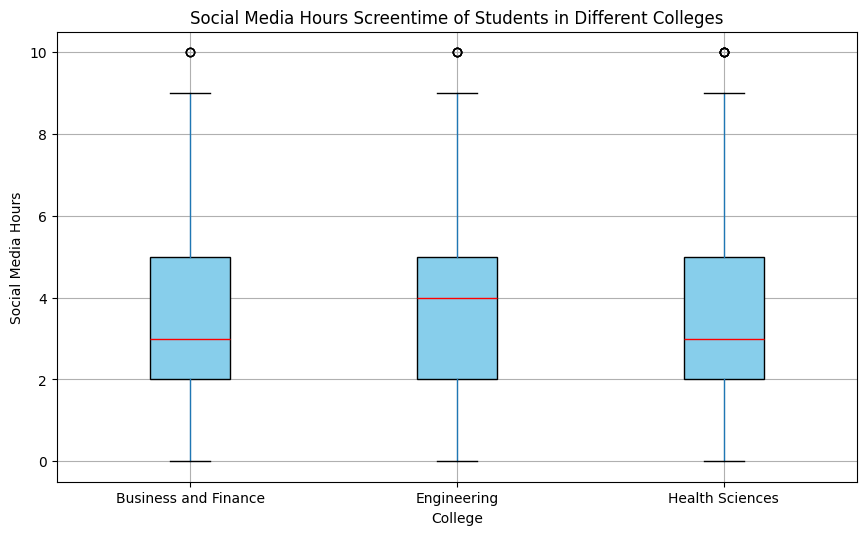

In [118]:
df.boxplot(column='SocMediaHrs', by='College', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Social Media Hours Screentime of Students in Different Colleges')
plt.suptitle('')
plt.xlabel('College')
plt.ylabel('Social Media Hours')
plt.show()

#### ii. College of Engineering

In [119]:
socmedia_eng = df_engineering.groupby('Degree_Program')['SocMediaHrs'].describe()
socmedia_eng

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                     
Aerospace       639.0  3.466354  1.932654  0.0  2.0  3.0  5.0  10.0
Civil           621.0  3.521739  1.863467  0.0  2.0  3.0  5.0  10.0
Computer        676.0  3.513314  1.988441  0.0  2.0  4.0  5.0  10.0
Electrical      665.0  3.506767  1.943564  0.0  2.0  4.0  5.0   9.0
Mechanical      633.0  3.636651  1.913654  0.0  2.0  4.0  5.0   9.0

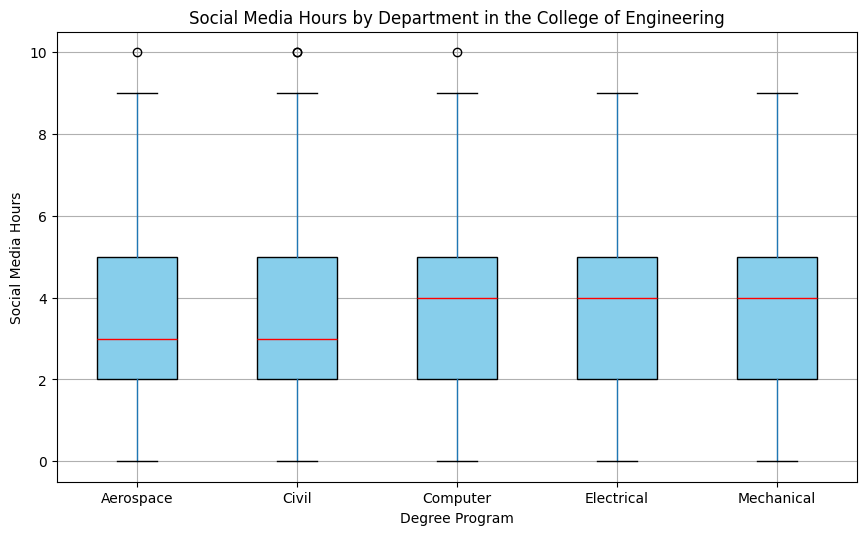

In [120]:
df_engineering.boxplot(column='SocMediaHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Social Media Hours by Department in the College of Engineering')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Social Media Hours')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [121]:
socmedia_busfin = df_busfinance.groupby('Degree_Program')['SocMediaHrs'].describe()
socmedia_busfin

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                              
Accountancy              794.0  3.462217  1.935715  0.0  2.0  3.0  5.0   9.0
Business Administration  780.0  3.405128  1.928763  0.0  2.0  3.0  5.0  10.0
Finance                  831.0  3.581227  1.940770  0.0  2.0  3.0  5.0  10.0
Marketing                808.0  3.599010  1.930669  0.0  2.0  4.0  5.0  10.0

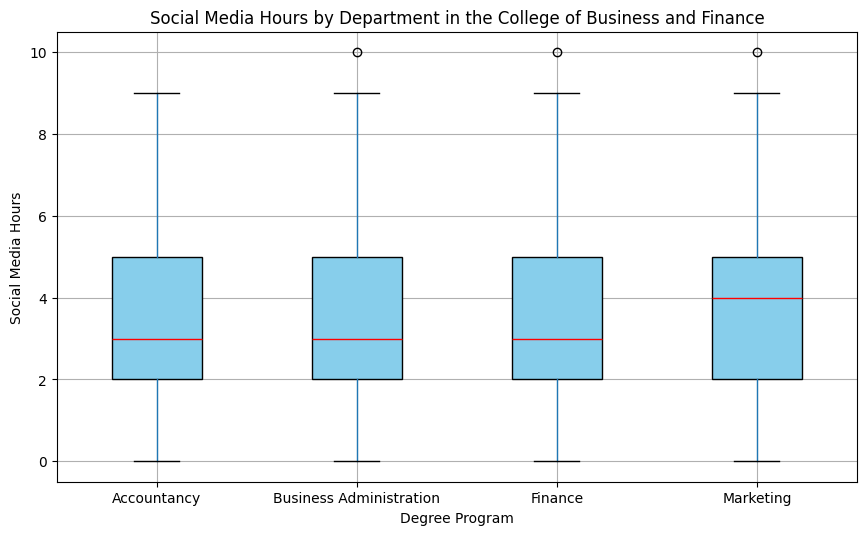

In [122]:
df_busfinance.boxplot(column='SocMediaHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Social Media Hours by Department in the College of Business and Finance')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Social Media Hours')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [123]:
socmedia_healthsci = df_healthsci.groupby('Degree_Program')['SocMediaHrs'].describe()
socmedia_healthsci

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                         
Medical Technology  778.0  3.559126  1.997998  0.0  2.0  3.0  5.0  10.0
Nursing             823.0  3.470231  1.965339  0.0  2.0  3.0  5.0  10.0
Pharmacy            814.0  3.552826  1.915570  0.0  2.0  4.0  5.0   9.0
Physical Therapy    767.0  3.498044  1.911128  0.0  2.0  3.0  5.0  10.0

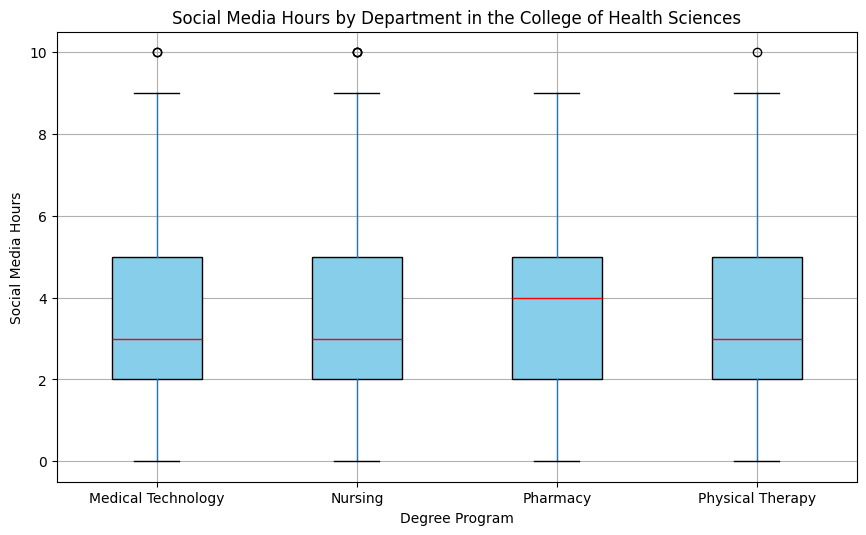

In [124]:
df_healthsci.boxplot(column='SocMediaHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Social Media Hours by Department in the College of Health Sciences')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Social Media Hours')
plt.xticks(rotation=0)
plt.show()

### E. Average Sleep Duration

#### i. General Population

In [125]:
sleephrs_bycollege = df.groupby('College')['SleepHrs'].describe()
sleephrs_bycollege


count      mean       std  min  25%  50%  75%   max
College                                                                   
Business and Finance  3213.0  6.272331  1.443920  4.0  5.0  6.0  7.0  10.0
Engineering           3234.0  6.226964  1.463591  4.0  5.0  6.0  7.0  10.0
Health Sciences       3182.0  6.298240  1.482367  4.0  5.0  6.0  7.0  10.0

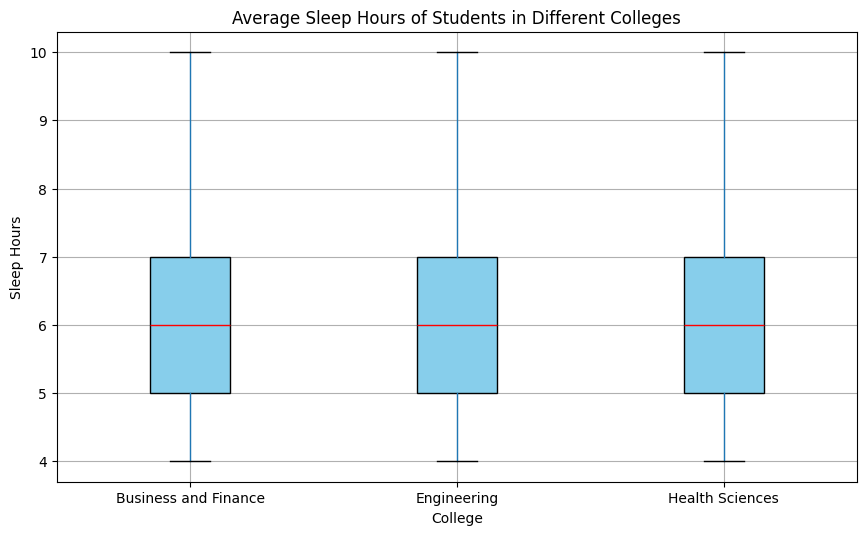

In [126]:
df.boxplot(column='SleepHrs', by='College', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Average Sleep Hours of Students in Different Colleges')
plt.suptitle('')
plt.xlabel('College')
plt.ylabel('Sleep Hours')
plt.show()

#### ii. College of Engineering

In [127]:
sleephrs_eng = df_engineering.groupby('Degree_Program')['SleepHrs'].describe()
sleephrs_eng

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                     
Aerospace       639.0  6.214397  1.402879  4.0  5.0  6.0  7.0  10.0
Civil           621.0  6.256039  1.496388  4.0  5.0  6.0  7.0  10.0
Computer        676.0  6.247041  1.494555  4.0  5.0  6.0  7.0  10.0
Electrical      665.0  6.218045  1.456903  4.0  5.0  6.0  7.0  10.0
Mechanical      633.0  6.199052  1.468509  4.0  5.0  6.0  7.0  10.0

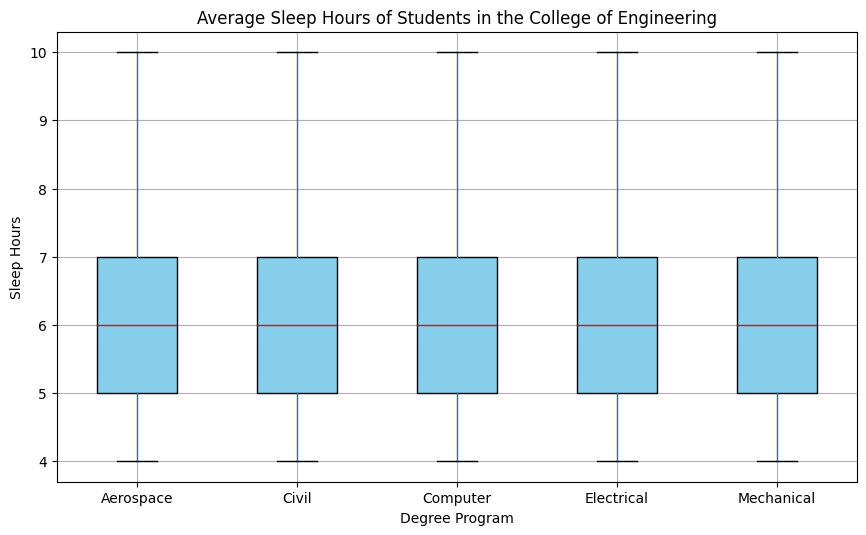

In [128]:
df_engineering.boxplot(column='SleepHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Average Sleep Hours of Students in the College of Engineering')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=0)
plt.show()

#### iii. College of Business and Finance

In [129]:
sleephrs_busfin = df_busfinance.groupby('Degree_Program')['SleepHrs'].describe()
sleephrs_busfin

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                              
Accountancy              794.0  6.256927  1.389742  4.0  5.0  6.0  7.0  10.0
Business Administration  780.0  6.296154  1.447670  4.0  5.0  6.0  7.0  10.0
Finance                  831.0  6.229844  1.440841  4.0  5.0  6.0  7.0  10.0
Marketing                808.0  6.308168  1.496078  4.0  5.0  6.0  7.0  10.0

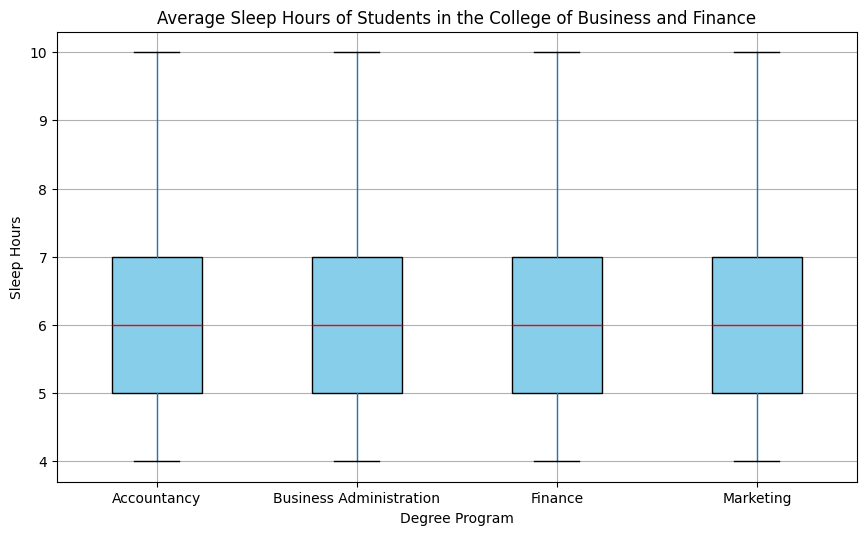

In [130]:
df_busfinance.boxplot(column='SleepHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Average Sleep Hours of Students in the College of Business and Finance')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=0)
plt.show()

#### iv. College of Health Sciences

In [131]:
sleephrs_healthsci = df_healthsci.groupby('Degree_Program')['SleepHrs'].describe()
sleephrs_healthsci

count      mean       std  min  25%  50%  75%   max
Degree_Program                                                         
Medical Technology  778.0  6.278920  1.446815  4.0  5.0  6.0  7.0  10.0
Nursing             823.0  6.376671  1.471229  4.0  5.0  6.0  7.0  10.0
Pharmacy            814.0  6.224816  1.502707  4.0  5.0  6.0  7.0  10.0
Physical Therapy    767.0  6.311604  1.506525  4.0  5.0  6.0  7.0  10.0

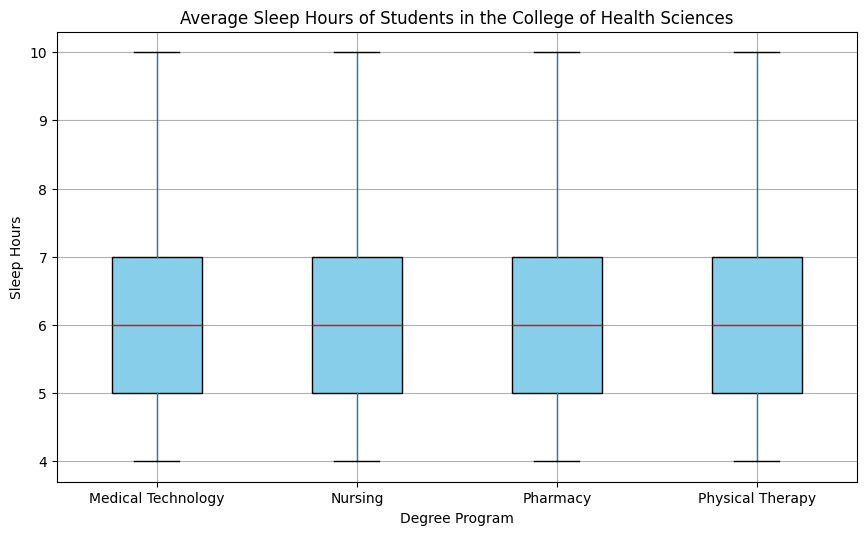

In [132]:
df_healthsci.boxplot(column='SleepHrs', by='Degree_Program', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'), figsize=(10, 6))
plt.title('Average Sleep Hours of Students in the College of Health Sciences')
plt.suptitle('')
plt.xlabel('Degree Program')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=0)
plt.show()

## IV. Academic Correlation Analysis

#### A. Examination Performance vs Attendance Rate

##### i. College of Engineering

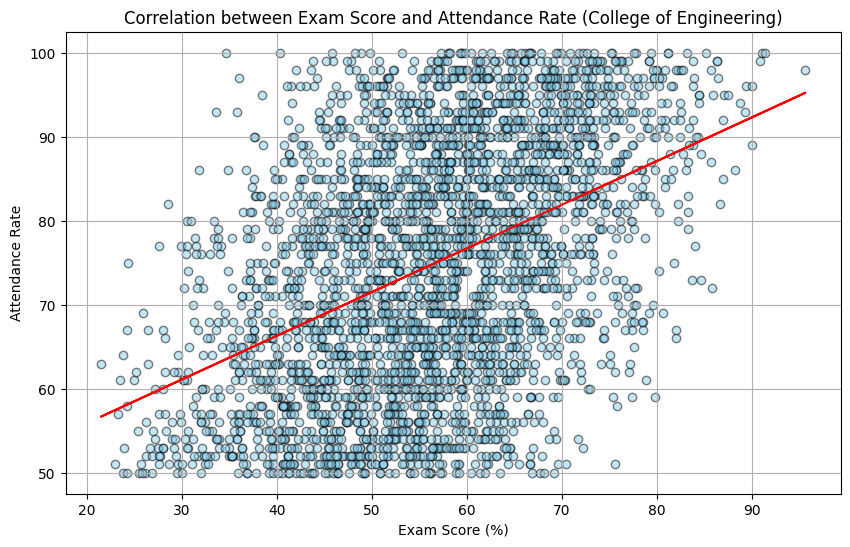

In [137]:
plt.figure(figsize=(10, 6))
x_eng = df_engineering['Exam_Score(%)']
y_eng = df_engineering['AttendRate']
plt.scatter(x_eng, y_eng, alpha=0.5, color='skyblue', edgecolor='black')

z_eng = np.polyfit(x_eng, y_eng, 1)
p_eng = np.poly1d(z_eng)
plt.plot(x_eng, p_eng(x_eng), color='red')

plt.title('Correlation between Exam Score and Attendance Rate (College of Engineering)')
plt.xlabel('Exam Score (%)')
plt.ylabel('Attendance Rate')
plt.grid(True)
plt.show()

##### ii. College of Business and Finance

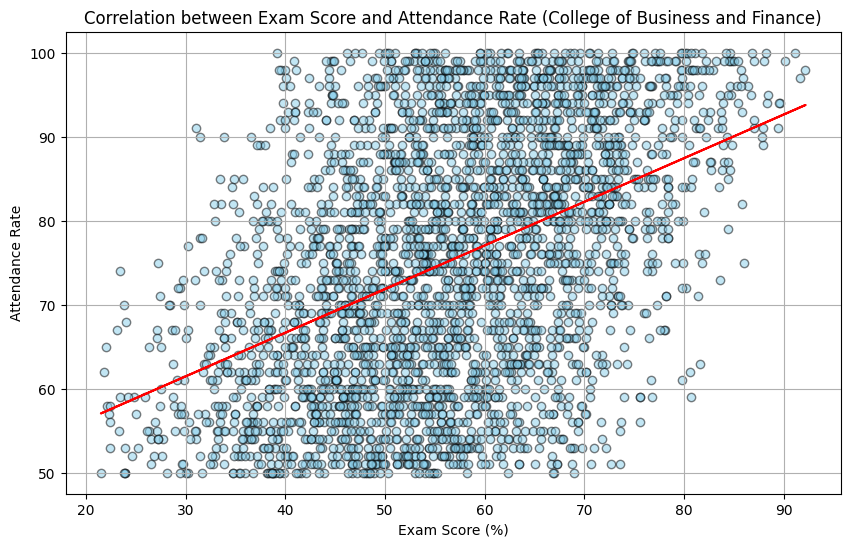

In [138]:
plt.figure(figsize=(10, 6))
x_bf = df_busfinance['Exam_Score(%)']
y_bf = df_busfinance['AttendRate']
plt.scatter(x_bf, y_bf, alpha=0.5, color='skyblue', edgecolor='black')

z_bf = np.polyfit(x_bf, y_bf, 1)
p_bf = np.poly1d(z_bf)
plt.plot(x_bf, p_bf(x_bf), color='red')

plt.title('Correlation between Exam Score and Attendance Rate (College of Business and Finance)')
plt.xlabel('Exam Score (%)')
plt.ylabel('Attendance Rate')
plt.grid(True)
plt.show()

##### iii. College of Health Sciences

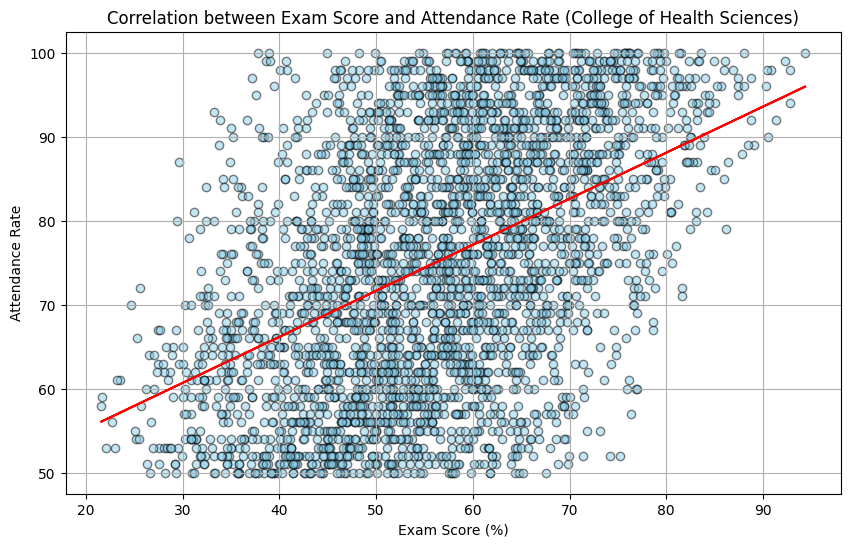

In [139]:
plt.figure(figsize=(10, 6))
x_healthsci = df_healthsci['Exam_Score(%)']
y_healthsci = df_healthsci['AttendRate']
plt.scatter(x_healthsci, y_healthsci, alpha=0.5, color='skyblue', edgecolor='black')

z_healthsci = np.polyfit(x_healthsci, y_healthsci, 1)
p_healthsci = np.poly1d(z_healthsci)
plt.plot(x_healthsci, p_healthsci(x_healthsci), color='red')

plt.title('Correlation between Exam Score and Attendance Rate (College of Health Sciences)')
plt.xlabel('Exam Score (%)')
plt.ylabel('Attendance Rate')
plt.grid(True)
plt.show()

### B. Final Grade vs Study Hours

#### i. College of Engineering

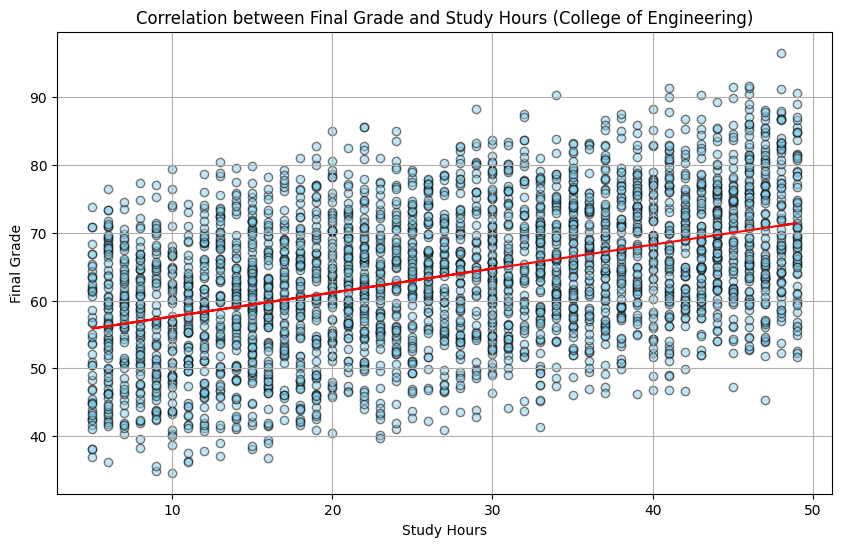

In [ ]:
plt.figure(figsize=(10, 6))
x_studyhrs_eng = df_engineering['StudyHrs']
y_grade_eng = df_engineering['Equiv_Grade']
plt.scatter(x_studyhrs_eng, y_grade_eng, alpha=0.5, color='skyblue', edgecolor='black')

z_studyhrs_eng = np.polyfit(x_studyhrs_eng, y_grade_eng, 1)
p_studyhrs_eng = np.poly1d(z_studyhrs_eng)
plt.plot(x_studyhrs_eng, p_studyhrs_eng(x_studyhrs_eng), color='red')

plt.title('Correlation between Final Grade and Study Hours (College of Engineering)')
plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.grid(True)
plt.show()


#### ii. College of Business and Finance

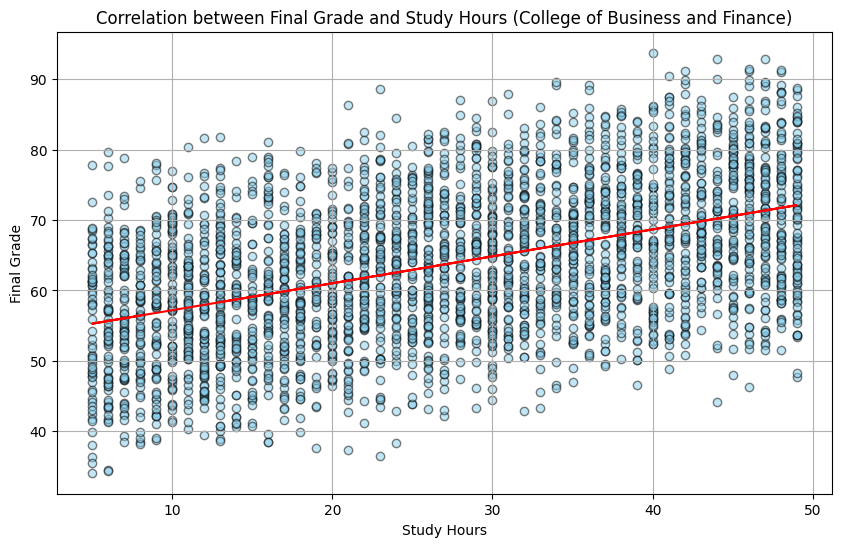

In [141]:
plt.figure(figsize=(10, 6))
x_studyhrs_bf = df_busfinance['StudyHrs']
y_grade_bf = df_busfinance['Equiv_Grade']
plt.scatter(x_studyhrs_bf, y_grade_bf, alpha=0.5, color='skyblue', edgecolor='black')

z_studyhrs_bf = np.polyfit(x_studyhrs_bf, y_grade_bf, 1)
p_studyhrs_bf = np.poly1d(z_studyhrs_bf)
plt.plot(x_studyhrs_bf, p_studyhrs_bf(x_studyhrs_bf), color='red')

plt.title('Correlation between Final Grade and Study Hours (College of Business and Finance)')
plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.grid(True)
plt.show()

#### iii. College of Health Sciences

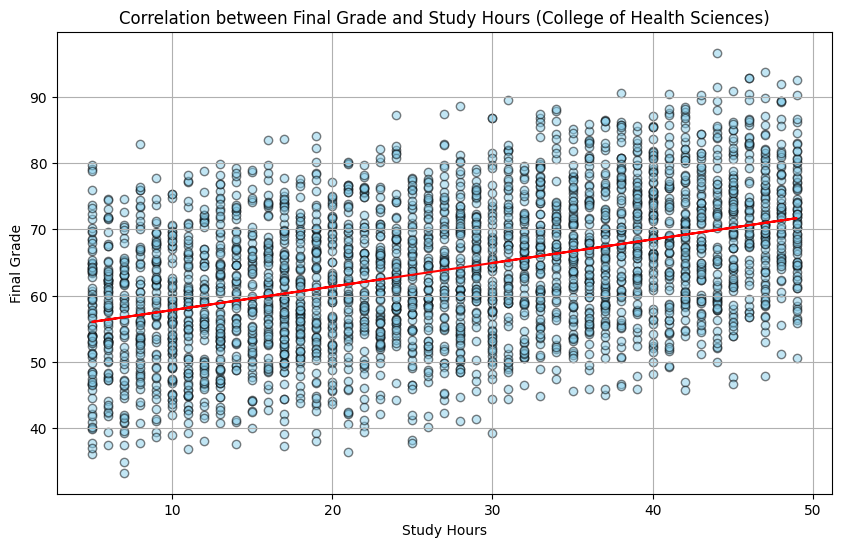

In [142]:
plt.figure(figsize=(10, 6))
x_studyhrs_healthsci = df_healthsci['StudyHrs']
y_grade_healthsci = df_healthsci['Equiv_Grade']
plt.scatter(x_studyhrs_healthsci, y_grade_healthsci, alpha=0.5, color='skyblue', edgecolor='black')

z_studyhrs_healthsci = np.polyfit(x_studyhrs_healthsci, y_grade_healthsci, 1)
p_studyhrs_healthsci = np.poly1d(z_studyhrs_healthsci)
plt.plot(x_studyhrs_healthsci, p_studyhrs_healthsci(x_studyhrs_healthsci), color='red')

plt.title('Correlation between Final Grade and Study Hours (College of Health Sciences)')
plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.grid(True)
plt.show()

### C. Assignment Performance Rate vs. Exam Score

#### i. College of Engineering

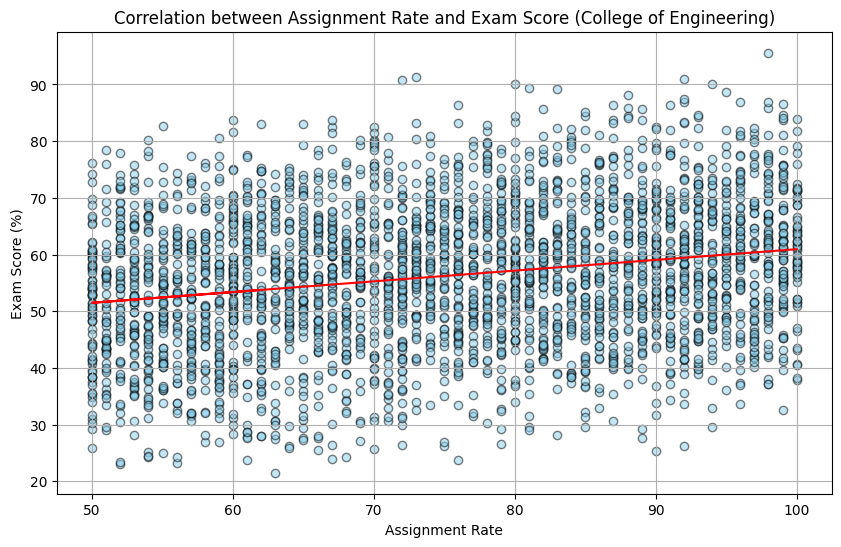

In [143]:
plt.figure(figsize=(10, 6))
x_assign_eng = df_engineering['AssignRate']
y_exam_eng = df_engineering['Exam_Score(%)']
plt.scatter(x_assign_eng, y_exam_eng, alpha=0.5, color='skyblue', edgecolor='black')

z_assign_eng = np.polyfit(x_assign_eng, y_exam_eng, 1)
p_assign_eng = np.poly1d(z_assign_eng)
plt.plot(x_assign_eng, p_assign_eng(x_assign_eng), color='red')

plt.title('Correlation between Assignment Rate and Exam Score (College of Engineering)')
plt.xlabel('Assignment Rate')
plt.ylabel('Exam Score (%)')
plt.grid(True)
plt.show()

#### ii. College of Business and Finance

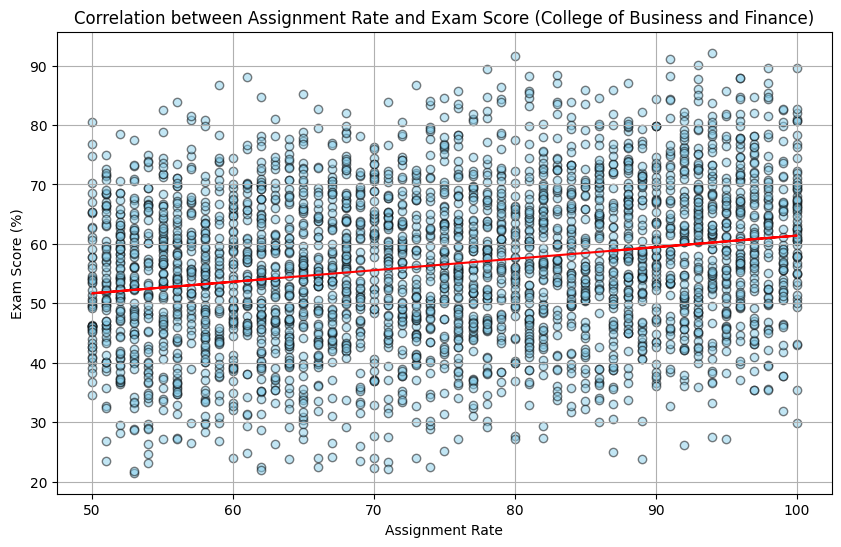

In [144]:
plt.figure(figsize=(10, 6))
x_assign_bf = df_busfinance['AssignRate']
y_exam_bf = df_busfinance['Exam_Score(%)']
plt.scatter(x_assign_bf, y_exam_bf, alpha=0.5, color='skyblue', edgecolor='black')

z_assign_bf = np.polyfit(x_assign_bf, y_exam_bf, 1)
p_assign_bf = np.poly1d(z_assign_bf)
plt.plot(x_assign_bf, p_assign_bf(x_assign_bf), color='red')

plt.title('Correlation between Assignment Rate and Exam Score (College of Business and Finance)')
plt.xlabel('Assignment Rate')
plt.ylabel('Exam Score (%)')
plt.grid(True)
plt.show()

#### iii. College of Health Sciences

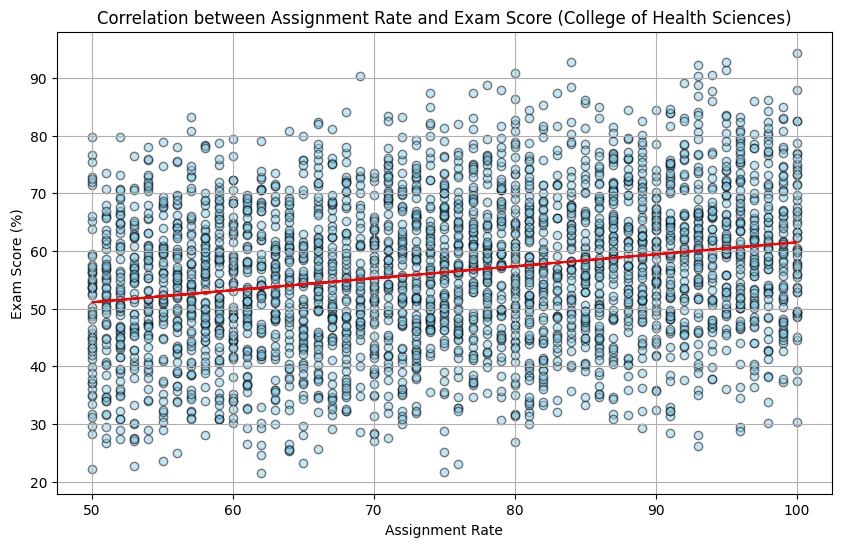

In [146]:
plt.figure(figsize=(10, 6))
x_assign_healthsci = df_healthsci['AssignRate']
y_exam_healthsci = df_healthsci['Exam_Score(%)']
plt.scatter(x_assign_healthsci, y_exam_healthsci, alpha=0.5, color='skyblue', edgecolor='black')

z_assign_healthsci = np.polyfit(x_assign_healthsci, y_exam_healthsci, 1)
p_assign_healthsci = np.poly1d(z_assign_healthsci)
plt.plot(x_assign_healthsci, p_assign_healthsci(x_assign_healthsci), color='red')

plt.title('Correlation between Assignment Rate and Exam Score (College of Health Sciences)')
plt.xlabel('Assignment Rate')
plt.ylabel('Exam Score (%)')
plt.grid(True)
plt.show()

### D. Stress Level vs Sleep Hours

#### i. General Population

<Figure size 1000x600 with 0 Axes>

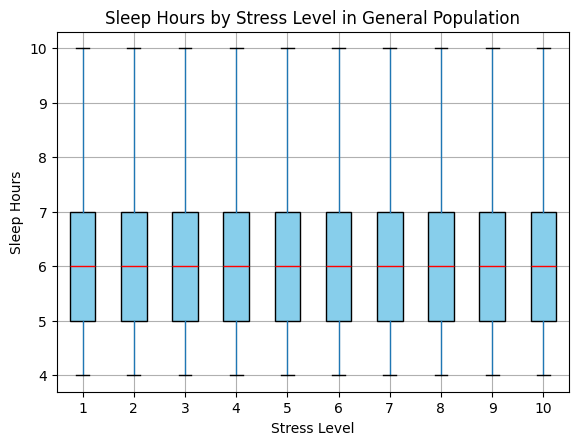

In [148]:
plt.figure(figsize=(10, 6))
df.boxplot(column='SleepHrs', by='StressLevel', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red'))
plt.title('Sleep Hours by Stress Level in General Population')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours')
plt.show()

### E. Stress Level vs Social Media Usage

#### i. General Population

<Figure size 1000x600 with 0 Axes>

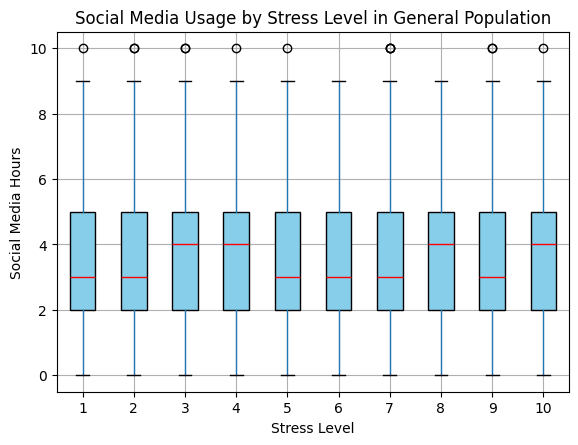

In [149]:
plt.figure(figsize=(10, 6))
df.boxplot(column='SocMediaHrs', by='StressLevel', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red'))
plt.title('Social Media Usage by Stress Level in General Population')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Social Media Hours')
plt.show()

### F. Learning Style vs Exam Performance

#### i. General Population

<Figure size 1000x600 with 0 Axes>

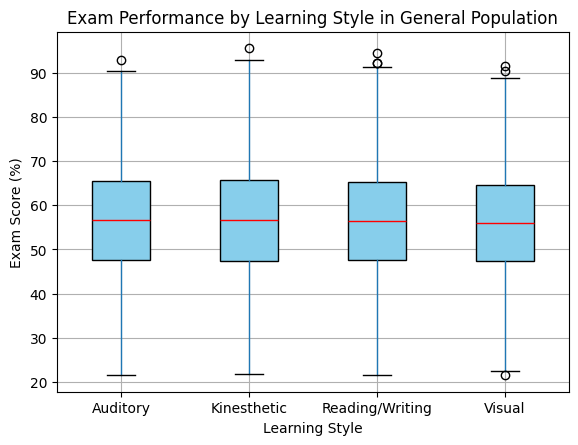

In [150]:
plt.figure(figsize=(10, 6))
df_active.boxplot(column='Exam_Score(%)', by='Learning_Style', patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'))
plt.title('Exam Performance by Learning Style in General Population')
plt.suptitle('')
plt.xlabel('Learning Style')
plt.ylabel('Exam Score (%)')
plt.show()

#### ii. College of Engineering

<Figure size 1000x600 with 0 Axes>

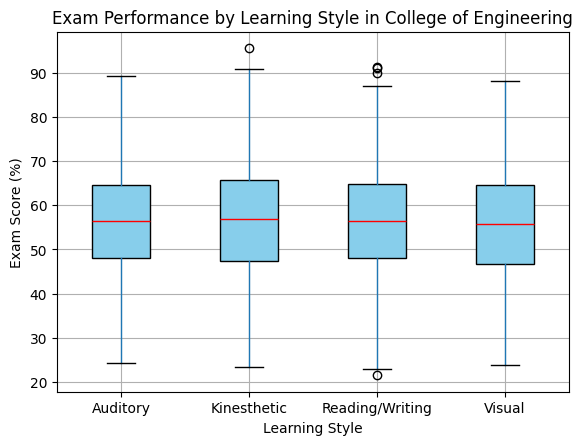

In [151]:
plt.figure(figsize=(10, 6))
df_engineering.boxplot(column='Exam_Score(%)', by='Learning_Style', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'))
plt.title('Exam Performance by Learning Style in College of Engineering')
plt.suptitle('')
plt.xlabel('Learning Style')
plt.ylabel('Exam Score (%)')
plt.show()

#### iii. College of Business and Finance

<Figure size 1000x600 with 0 Axes>

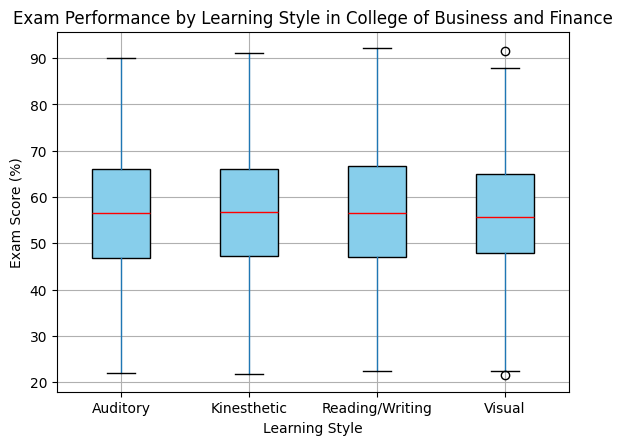

In [152]:
plt.figure(figsize=(10, 6))
df_busfinance.boxplot(column='Exam_Score(%)', by='Learning_Style', patch_artist=True,
                      boxprops=dict(facecolor='skyblue', color='black'),
                      medianprops=dict(color='red'))
plt.title('Exam Performance by Learning Style in College of Business and Finance')
plt.suptitle('')
plt.xlabel('Learning Style')
plt.ylabel('Exam Score (%)')
plt.show()

#### iv. College of Health Sciences

In [ ]:
plt.figure(figsize=(10, 6))
df_healthsci.boxplot(column='Exam_Score(%)', by='Learning_Style', patch_artist=True,
                     boxprops=dict(facecolor='skyblue', color='black'),
                     medianprops=dict(color='red'))
plt.title('Exam Performance by Learning Style in College of Health Sciences')
plt.suptitle('')
plt.xlabel('Learning Style')
plt.ylabel('Exam Score (%)')
plt.show()

### G. Technology Use vs Exam Performance

#### i. General Population

<Figure size 1000x600 with 0 Axes>

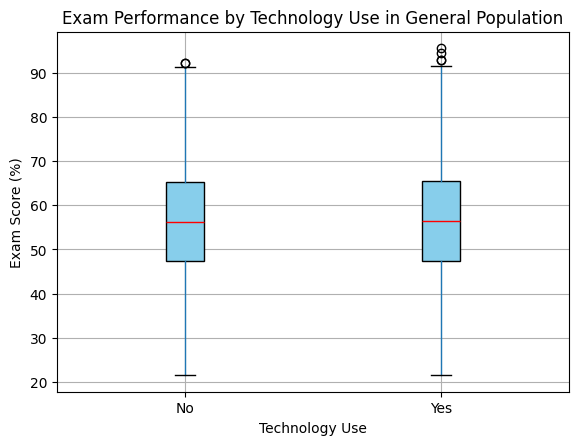

In [153]:
plt.figure(figsize=(10, 6))
df_active.boxplot(column='Exam_Score(%)', by='TechUse', patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'))
plt.title('Exam Performance by Technology Use in General Population')
plt.suptitle('')
plt.xlabel('Technology Use')
plt.ylabel('Exam Score (%)')
plt.show()

#### ii. College of Engineering

<Figure size 1000x600 with 0 Axes>

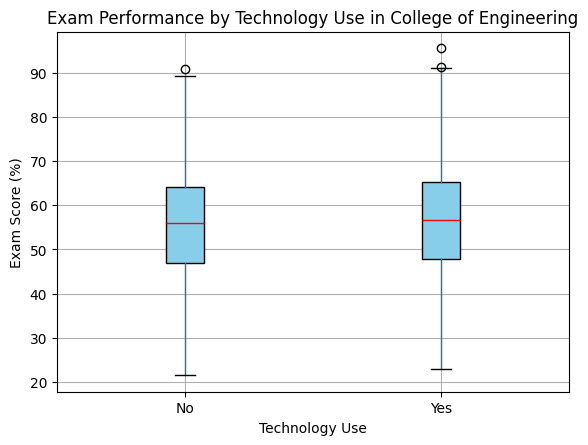

In [154]:
plt.figure(figsize=(10, 6))
df_engineering.boxplot(column='Exam_Score(%)', by='TechUse', patch_artist=True,
                       boxprops=dict(facecolor='skyblue', color='black'),
                       medianprops=dict(color='red'))
plt.title('Exam Performance by Technology Use in College of Engineering')
plt.suptitle('')
plt.xlabel('Technology Use')
plt.ylabel('Exam Score (%)')
plt.show()

#### iii. College of Business and Finance

<Figure size 1000x600 with 0 Axes>

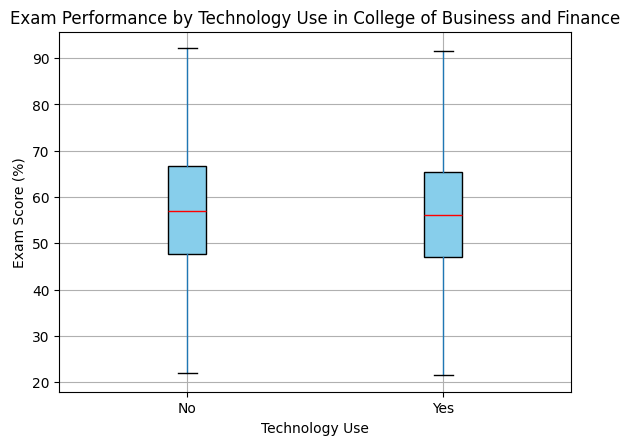

In [155]:
plt.figure(figsize=(10, 6))
df_busfinance.boxplot(column='Exam_Score(%)', by='TechUse', patch_artist=True,
                      boxprops=dict(facecolor='skyblue', color='black'),
                      medianprops=dict(color='red'))
plt.title('Exam Performance by Technology Use in College of Business and Finance')
plt.suptitle('')
plt.xlabel('Technology Use')
plt.ylabel('Exam Score (%)')
plt.show()

#### iv. College of Health Sciences

<Figure size 1000x600 with 0 Axes>

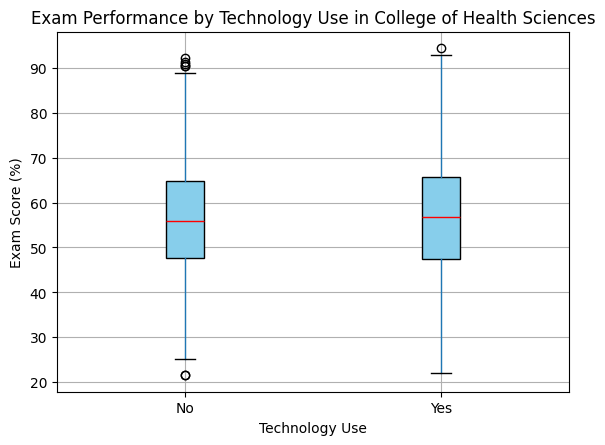

In [156]:
plt.figure(figsize=(10, 6))
df_healthsci.boxplot(column='Exam_Score(%)', by='TechUse', patch_artist=True,
                     boxprops=dict(facecolor='skyblue', color='black'),
                     medianprops=dict(color='red'))
plt.title('Exam Performance by Technology Use in College of Health Sciences')
plt.suptitle('')
plt.xlabel('Technology Use')
plt.ylabel('Exam Score (%)')
plt.show()